#About Zee

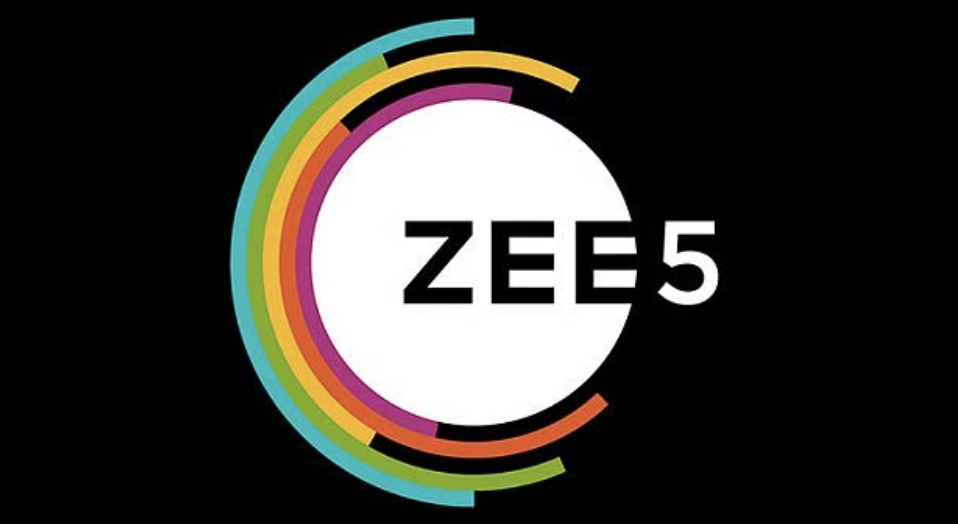

##Problem Statement

* Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

##Data Dictionary

<font size = '4'>
RATINGS FILE DESCRIPTION

- All ratings are contained in the file "ratings.dat" and are in the following format:

      - UserID::MovieID::Rating::Timestamp

      - UserIDs range between 1 and 6040

      - MovieIDs range between 1 and 3952

      - Ratings are made on a 5-star scale (whole-star ratings only)

      - Timestamp is represented in seconds

      - Each user has at least 20 ratings

<font size = '4'>
USERS FILE DESCRIPTION

- User information is in the file "users.dat" and is in the following format:

    - UserID::Gender::Age::Occupation::Zip-code

- All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female

      Age is chosen from the following ranges:

      1: "Under 18"
      18: "18-24"
      25: "25-34"
      35: "35-44"
      45: "45-49"
      50: "50-55"
      56: "56+"

- Occupation is chosen from the following choices:

      0: "other" or not specified
      1: "academic/educator"
      2: "artist"
      3: "clerical/admin"
      4: "college/grad student"
      5: "customer service"
      6: "doctor/health care"
      7: "executive/managerial"
      8: "farmer"
      9: "homemaker"
      10: "K-12 student"
      11: "lawyer"
      12: "programmer"
      13: "retired"
      14: "sales/marketing"
      15: "scientist"
      16: "self-employed"
      17: "technician/engineer"
      18: "tradesman/craftsman"
      19: "unemployed"
      20: "writer"


<font size = '4'>
MOVIES FILE DESCRIPTION

- Movie information is in the file "movies.dat" and is in the following format:

     - MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including year of release)

      - Genres are pipe-separated and are selected from the following genres:

      Action
      Adventure
      Animation
      Children's
      Comedy
      Crime
      Documentary
      Drama
      Fantasy
      Film-Noir
      Horror
      Musical
      Mystery
      Romance
      Sci-Fi
      Thriller
      War
      Western

#Load Dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt, seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown 1G-VnwOLSqK69JHE9ItbIvXOjj1stQXG4
!gdown 1G1cAjKDEeBgh8Qws5OlxSGRfSenUz94o
!gdown 1G-1fRDVpt7Op4UgFkYSpmLKa6BKd3Lrr

Downloading...
From: https://drive.google.com/uc?id=1G-VnwOLSqK69JHE9ItbIvXOjj1stQXG4
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 19.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G1cAjKDEeBgh8Qws5OlxSGRfSenUz94o
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 87.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G-1fRDVpt7Op4UgFkYSpmLKa6BKd3Lrr
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 6.76MB/s]


In [ ]:
movies = pd.read_fwf('zee-movies.dat', encoding='ISO-8859-1')
ratings = pd.read_fwf('zee-ratings.dat', encoding='ISO-8859-1')
users = pd.read_fwf('zee-users.dat', encoding='ISO-8859-1')

In [ ]:
movies.head(3)

Movie ID::Title::Genres Unnamed: 1 Unnamed: 2
0  1::Toy Story (1995)::Animation|Children's|Comedy        NaN        NaN
1   2::Jumanji (1995)::Adventure|Children's|Fantasy        NaN        NaN
2        3::Grumpier Old Men (1995)::Comedy|Romance        NaN        NaN

In [ ]:
ratings.head(3)

UserID::MovieID::Rating::Timestamp
0              1::1193::5::978300760
1               1::661::3::978302109
2               1::914::3::978301968

In [ ]:
users.head(3)

UserID::Gender::Age::Occupation::Zip-code
0                        1::F::1::10::48067
1                       2::M::56::16::70072
2                       3::M::25::15::55117

<font size = '4'>
All these dataframes have only 1 column with data separated by only delimiter.

##Preprocessing

In [ ]:
delimiter ="::"

users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split(delimiter,expand = True)
users.columns = ["UserID","Gender","Age","Occupation","Zipcode"]

users.head(3)

UserID Gender Age Occupation Zipcode
0      1      F   1         10   48067
1      2      M  56         16   70072
2      3      M  25         15   55117

In [ ]:
users["Age"] = users["Age"].replace({"1": "Under 18","18": "18-24","25": "25-34","35": "35-44","45": "45-49","50": "50-55","56": "56+"})

users["Occupation"] = users["Occupation"].astype(int).replace({0: "other", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                                                               4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                                                               7: "executive/managerial", 8: "farmer" ,9: "homemaker",10: "K-12 student",
                                                               11: "lawyer", 12: "programmer",13: "retired",14: "sales/marketing",
                                                               15: "scientist", 16: "self-employed", 17: "technician/engineer",
                                                               18: "tradesman/craftsman",19: "unemployed",20: "writer"})

users.head(3)

UserID Gender       Age     Occupation Zipcode
0      1      F  Under 18   K-12 student   48067
1      2      M       56+  self-employed   70072
2      3      M     25-34      scientist   55117

In [ ]:
ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split(delimiter,expand = True)
ratings.columns = ["UserID","MovieID","Rating","Timestamp"]

ratings.head(3)

UserID MovieID Rating  Timestamp
0      1    1193      5  978300760
1      1     661      3  978302109
2      1     914      3  978301968

* <font size='4'>"Timestamp" must be manipulated to an appropraite format.
* In this case, extracting "watch hours" may be useful.

In [ ]:
from datetime import datetime
ratings["Watch_Hour"] =ratings["Timestamp"].apply(lambda x:datetime.fromtimestamp(int(x)).hour)
ratings.drop(["Timestamp"],axis = 1,inplace=True)
ratings.head(3)

UserID MovieID Rating  Watch_Hour
0      1    1193      5          22
1      1     661      3          22
2      1     914      3          22

In [ ]:
movies.drop(["Unnamed: 1","Unnamed: 2"],axis = 1,inplace=True)

movies = movies["Movie ID::Title::Genres"].str.split(delimiter,expand = True)
movies.columns = ["MovieID","Title","Genres"]

movies.head(3)

MovieID                    Title                        Genres
0       1         Toy Story (1995)   Animation|Children's|Comedy
1       2           Jumanji (1995)  Adventure|Children's|Fantasy
2       3  Grumpier Old Men (1995)                Comedy|Romance


* <font size='4'>"Genres" must be manipulated by using "explode". But, we'll do it after EDA.
* "Title" contains release year too. It must be extracted.

In [ ]:
movies["Release_year"] = movies["Title"].str.extract('^(.+)\s\(([0-9]*)\)$',expand = True)[1]
movies["Title"] = movies["Title"].str.split("(").apply(lambda x:x[0])
movies.head(3)

MovieID              Title                        Genres Release_year
0       1         Toy Story    Animation|Children's|Comedy         1995
1       2           Jumanji   Adventure|Children's|Fantasy         1995
2       3  Grumpier Old Men                 Comedy|Romance         1995

In [ ]:
print('movies')
print('-'*30)
print(f'Rows: {movies.shape[0]}   Columns : {movies.shape[1]}')
print('-=-'*10)

print()
print('ratings')
print('-'*30)
print(f'Rows: {ratings.shape[0]}   Columns : {ratings.shape[1]}')
print('-=-'*10)

print()

print('users')
print('-'*30)
print(f'Rows: {users.shape[0]}   Columns : {users.shape[1]}')
print('-=-'*10)

movies
------------------------------
Rows: 3883   Columns : 4
-=--=--=--=--=--=--=--=--=--=-

ratings
------------------------------
Rows: 1000209   Columns : 4
-=--=--=--=--=--=--=--=--=--=-

users
------------------------------
Rows: 6040   Columns : 5
-=--=--=--=--=--=--=--=--=--=-


* <font size='5'> Merging all these dataframes into one dataframe "df".

In [ ]:
df = users.merge(movies.merge(ratings,on="MovieID",how="outer"),on="UserID",how="outer")
df.head(3)

UserID Gender       Age    Occupation Zipcode MovieID        Title  \
0      1      F  Under 18  K-12 student   48067       1   Toy Story    
1      1      F  Under 18  K-12 student   48067      48  Pocahontas    
2      1      F  Under 18  K-12 student   48067     150   Apollo 13    

                                 Genres Release_year Rating  Watch_Hour  
0           Animation|Children's|Comedy         1995      5        23.0  
1  Animation|Children's|Musical|Romance         1995      5        23.0  
2                                 Drama         1995      5        22.0

In [ ]:
df.shape

(1000386, 11)

In [ ]:
df.isna().sum()

UserID           177
Gender           177
Age              177
Occupation       177
Zipcode          177
MovieID            0
Title              0
Genres          4066
Release_year    3780
Rating           177
Watch_Hour       177
dtype: int64

In [ ]:
df_ = df.copy()

In [ ]:
df_.dropna(inplace=True)

In [ ]:
df_.isna().sum()

UserID          0
Gender          0
Age             0
Occupation      0
Zipcode         0
MovieID         0
Title           0
Genres          0
Release_year    0
Rating          0
Watch_Hour      0
dtype: int64

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996144 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        996144 non-null  object 
 1   Gender        996144 non-null  object 
 2   Age           996144 non-null  object 
 3   Occupation    996144 non-null  object 
 4   Zipcode       996144 non-null  object 
 5   MovieID       996144 non-null  object 
 6   Title         996144 non-null  object 
 7   Genres        996144 non-null  object 
 8   Release_year  996144 non-null  object 
 9   Rating        996144 non-null  object 
 10  Watch_Hour    996144 non-null  float64
dtypes: float64(1), object(10)
memory usage: 91.2+ MB


In [ ]:
df_['Release_year']=df_['Release_year'].astype('int32')
df_['Rating']=df_['Rating'].astype('int32')
df_['Watch_Hour']=df_['Watch_Hour'].astype('int32')

In [ ]:
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

df_["Released_In"] =  pd.cut(df_['Release_year'], bins=bins, labels=labels)
df_.head(3)

UserID Gender       Age    Occupation Zipcode MovieID        Title  \
0      1      F  Under 18  K-12 student   48067       1   Toy Story    
1      1      F  Under 18  K-12 student   48067      48  Pocahontas    
2      1      F  Under 18  K-12 student   48067     150   Apollo 13    

                                 Genres  Release_year  Rating  Watch_Hour  \
0           Animation|Children's|Comedy          1995       5          23   
1  Animation|Children's|Musical|Romance          1995       5          23   
2                                 Drama          1995       5          22   

  Released_In  
0         90s  
1         90s  
2         90s

#EDA

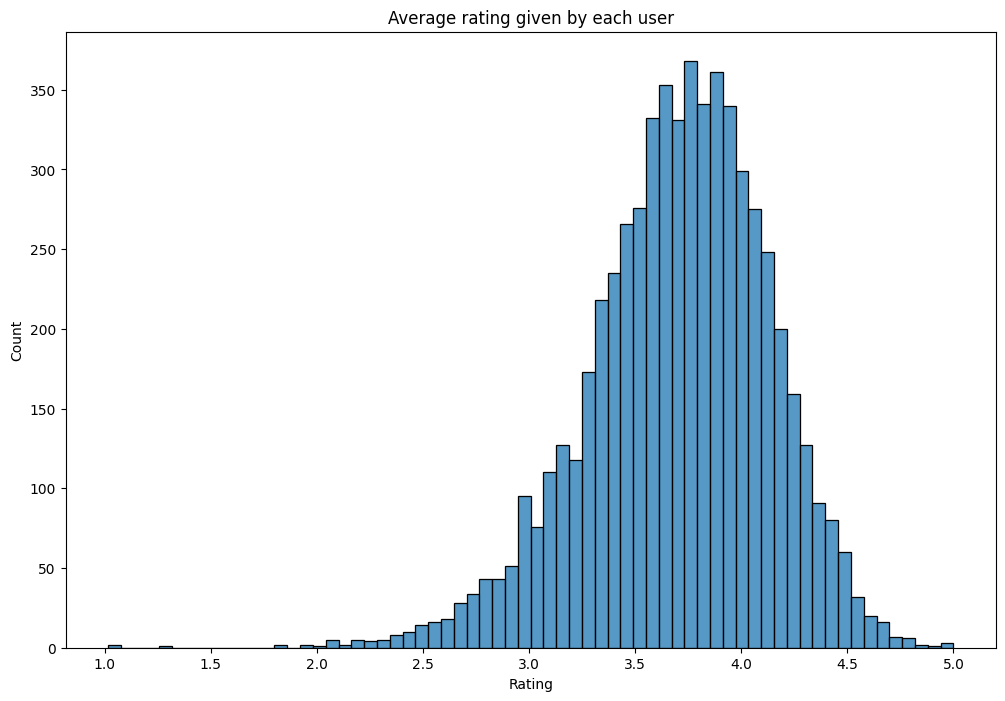

In [ ]:
sns.histplot(df_[['UserID','Rating']].groupby('UserID').mean()["Rating"])
plt.title('Average rating given by each user')
plt.show()

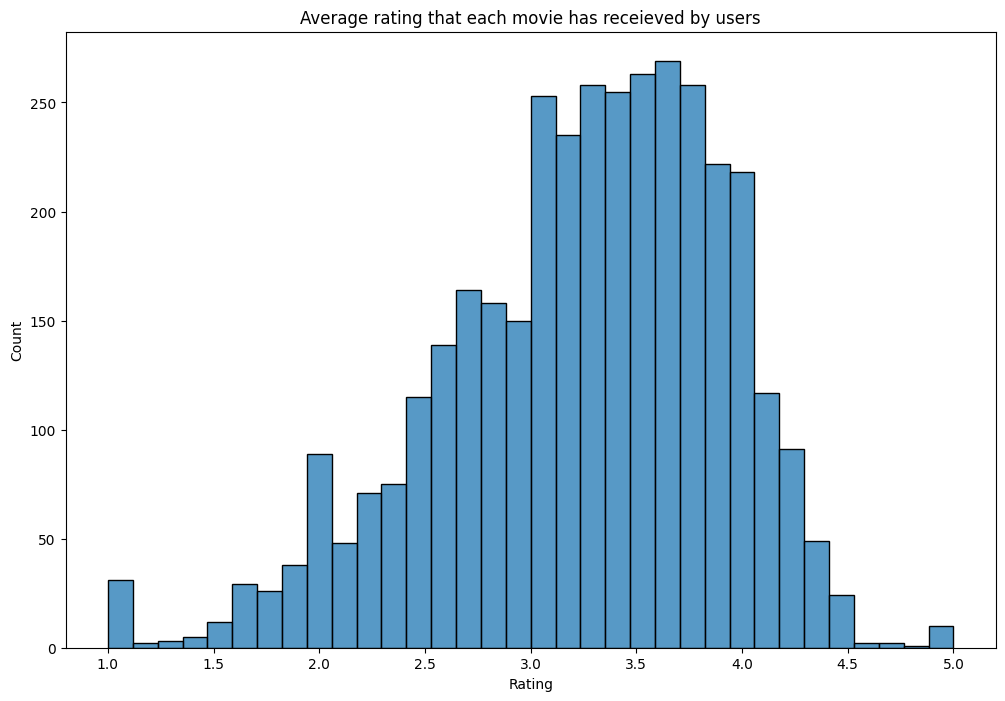

In [ ]:
sns.histplot(df_[['MovieID','Rating']].groupby('MovieID').mean()["Rating"])
plt.title('Average rating that each movie has receieved by users')
plt.show()

In [ ]:
df_['MovieID'].nunique()

3682

In [ ]:
movies_per_decade = df_[['MovieID','Released_In']].groupby('Released_In').nunique()
movies_per_decade["% of all Movies"] = (movies_per_decade["MovieID"]/(df_["MovieID"].nunique())) * 100
movies_per_decade

MovieID  % of all Movies
Released_In                          
20s               23         0.624661
30s               71         1.928300
40s              120         3.259098
50s              164         4.454101
60s              184         4.997284
70s              237         6.436719
80s              586        15.915263
90s             2294        62.303096

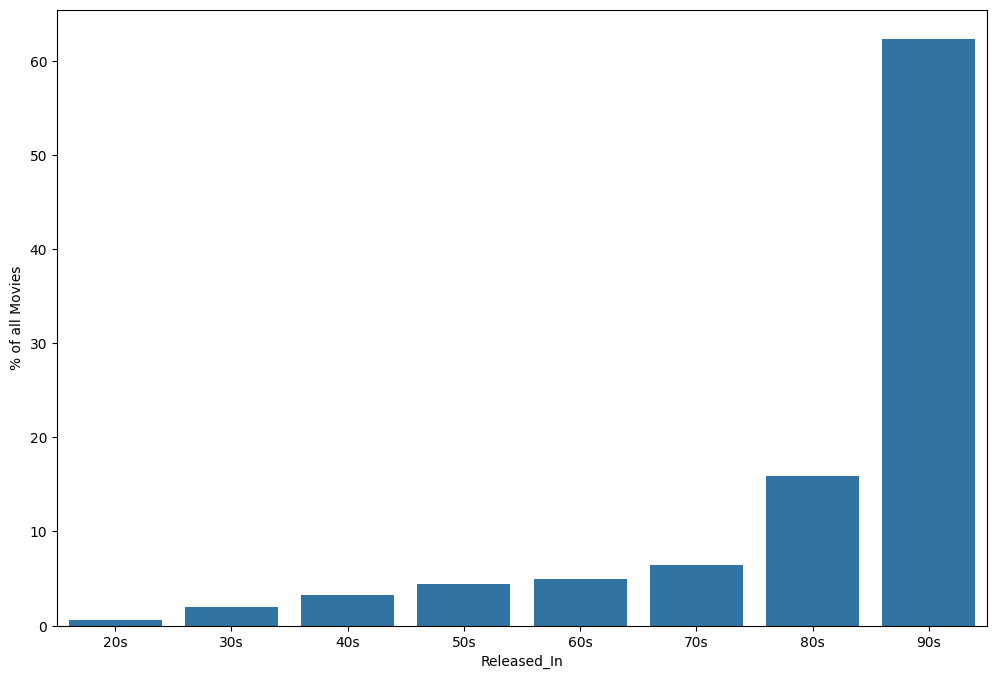

In [ ]:
sns.barplot(x = movies_per_decade.index, y= movies_per_decade["% of all Movies"])
plt.show()

In [ ]:
m = movies[["MovieID","Title","Genres"]]
m["Genres"] = m["Genres"].str.split("|")
m.head(3)

MovieID              Title                            Genres
0       1         Toy Story    [Animation, Children's, Comedy]
1       2           Jumanji   [Adventure, Children's, Fantasy]
2       3  Grumpier Old Men                  [Comedy, Romance]

In [ ]:
m = m.explode("Genres")
m.head(10)

MovieID               Title      Genres
0       1          Toy Story    Animation
0       1          Toy Story   Children's
0       1          Toy Story       Comedy
1       2            Jumanji    Adventure
1       2            Jumanji   Children's
1       2            Jumanji      Fantasy
2       3   Grumpier Old Men       Comedy
2       3   Grumpier Old Men      Romance
3       4  Waiting to Exhale       Comedy
3       4  Waiting to Exhale        Drama

<font size='4'>

* There are a few anamolies in "Genre". We'll have to correct it manually.

In [ ]:
m["Genres"] = m["Genres"].replace({"":"Other","Horro":"Horror","Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi",
                                   "Dr":"Drama","Documenta":"Documentary", "Wester":"Western","Fant":"Fantasy",
                                   "Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance","Animati":"Animation",
                                   "Childr":"Children's","Childre":"Children's","Fantas":"Fantasy","Come":"Comedy",
                                   "Dram":"Drama","S":"Sci-Fi","Roma":"Romance","A":"Adventure","Children":"Children's",
                                   "Adventu":"Adventure","Adv":"Adventure","Wa":"War","Thrille"  :"Thriller",
                                   "Com":"Comedy","Comed":"Comedy","Acti":"Action","Advent":"Adventure",
                                   "Adventur":"Adventure","Thri":"Thriller", "Chi":"Children's","Ro":"Romance",
                                   "F":"Fantasy","We":"Western","Documen":"Documentary","Music":"Musical",
                                   "Children":"Children's", "Horr":"Horror", "Children'":"Children's","Roman":"Romance",
                                   "Docu":"Documentary","Th":"Thriller","Document":"Documentary"})

m = m.pivot_table(values="Title", index="MovieID", columns="Genres", aggfunc= np.size).fillna(0)
m.head()

Genres   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
MovieID                                                                         
1           0.0        0.0        1.0         1.0     1.0    0.0          0.0   
10          1.0        1.0        0.0         0.0     0.0    0.0          0.0   
100         0.0        0.0        0.0         0.0     0.0    0.0          0.0   
1000        0.0        0.0        0.0         0.0     0.0    1.0          0.0   
1001        0.0        0.0        0.0         0.0     1.0    0.0          0.0   

Genres   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Other  Romance  \
MovieID                                                                        
1          0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
10         0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
100        1.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
1000       0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
1001       0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   

Genres   Sci-Fi  Thriller  War  Western  
MovieID                                  
1           0.0       0.0  0.0      0.0  
10          0.0       1.0  0.0      0.0  
100         0.0       1.0  0.0      0.0  
1000        0.0       0.0  0.0      0.0  
1001        0.0       0.0  0.0      0.0

In [ ]:
def apply(x):
  if x >= 1:
    return 1
  else:
    return 0

m["Adventure"] = m["Adventure"].apply(apply)
m = m.astype(int)
m.head()

Genres   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
MovieID                                                                         
1             0          0          1           1       1      0            0   
10            1          1          0           0       0      0            0   
100           0          0          0           0       0      0            0   
1000          0          0          0           0       0      1            0   
1001          0          0          0           0       1      0            0   

Genres   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Other  Romance  \
MovieID                                                                        
1            0        0          0       0        0        0      0        0   
10           0        0          0       0        0        0      0        0   
100          1        0          0       0        0        0      0        0   
1000         0        0          0       0        0        0      0        0   
1001         0        0          0       0        0        0      0        0   

Genres   Sci-Fi  Thriller  War  Western  
MovieID                                  
1             0         0    0        0  
10            0         1    0        0  
100           0         1    0        0  
1000          0         0    0        0  
1001          0         0    0        0

In [ ]:
final_data = df.merge(m,on="MovieID",how="left").drop(["Genres"],axis = 1)

In [ ]:
final_data

UserID Gender       Age    Occupation Zipcode MovieID  \
0            1      F  Under 18  K-12 student   48067       1   
1            1      F  Under 18  K-12 student   48067      48   
2            1      F  Under 18  K-12 student   48067     150   
3            1      F  Under 18  K-12 student   48067     260   
4            1      F  Under 18  K-12 student   48067     527   
...        ...    ...       ...           ...     ...     ...   
1000381    NaN    NaN       NaN           NaN     NaN    3650   
1000382    NaN    NaN       NaN           NaN     NaN    3750   
1000383    NaN    NaN       NaN           NaN     NaN    3829   
1000384    NaN    NaN       NaN           NaN     NaN    3856   
1000385    NaN    NaN       NaN           NaN     NaN    3907   

                                       Title Release_year Rating  Watch_Hour  \
0                                 Toy Story          1995      5        23.0   
1                                Pocahontas          1995      5        23.0   
2                                 Apollo 13          1995      5        22.0   
3        Star Wars: Episode IV - A New Hope          1977      4        22.0   
4                          Schindler's List          1993      5        23.0   
...                                      ...          ...    ...         ...   
1000381                             Anguish          1986    NaN         NaN   
1000382                      Boricua's Bond          2000    NaN         NaN   
1000383                     Mad About Mambo          2000    NaN         NaN   
1000384                        Autumn Heart          1999    NaN         NaN   
1000385         Prince of Central Park, The          1999    NaN         NaN   

         ...  Film-Noir  Horror  Musical  Mystery  Other  Romance  Sci-Fi  \
0        ...        0.0     0.0      0.0      0.0    0.0      0.0     0.0   
1        ...        0.0     0.0      1.0      0.0    0.0      1.0     0.0   
2        ...        0.0     0.0      0.0      0.0    0.0      0.0     0.0   
3        ...        0.0     0.0      0.0      0.0    0.0      0.0     0.0   
4        ...        0.0     0.0      0.0      0.0    0.0      0.0     0.0   
...      ...        ...     ...      ...      ...    ...      ...     ...   
1000381  ...        0.0     1.0      0.0      0.0    0.0      0.0     0.0   
1000382  ...        0.0     0.0      0.0      0.0    0.0      0.0     0.0   
1000383  ...        0.0     0.0      0.0      0.0    0.0      1.0     0.0   
1000384  ...        0.0     0.0      0.0      0.0    0.0      0.0     0.0   
1000385  ...        0.0     0.0      0.0      0.0    0.0      0.0     0.0   

         Thriller  War  Western  
0             0.0  0.0      0.0  
1             0.0  0.0      0.0  
2             0.0  0.0      0.0  
3             0.0  0.0      0.0  
4             0.0  1.0      0.0  
...           ...  ...      ...  
1000381       0.0  0.0      0.0  
1000382       0.0  0.0      0.0  
1000383       0.0  0.0      0.0  
1000384       0.0  0.0      0.0  
1000385       0.0  0.0      0.0  

[1000386 rows x 29 columns]

In [ ]:
final_data['MovieID'] = final_data.MovieID.astype(int)
final_data['UserID'] = final_data.UserID.astype(float)
final_data['Release_year'] = final_data.Release_year.astype(float)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000386 entries, 0 to 1000385
Data columns (total 29 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   UserID        1000209 non-null  float64
 1   Gender        1000209 non-null  object 
 2   Age           1000209 non-null  object 
 3   Occupation    1000209 non-null  object 
 4   Zipcode       1000209 non-null  object 
 5   MovieID       1000386 non-null  int64  
 6   Title         1000386 non-null  object 
 7   Release_year  996606 non-null   float64
 8   Rating        1000209 non-null  object 
 9   Watch_Hour    1000209 non-null  float64
 10  Action        996320 non-null   float64
 11  Adventure     996320 non-null   float64
 12  Animation     996320 non-null   float64
 13  Children's    996320 non-null   float64
 14  Comedy        996320 non-null   float64
 15  Crime         996320 non-null   float64
 16  Documentary   996320 non-null   float64
 17  Drama         996320 non-nu

In [ ]:
final_data.nunique()

UserID          6040
Gender             2
Age                7
Occupation        21
Zipcode         3439
MovieID         3883
Title           3833
Release_year      81
Rating             5
Watch_Hour        24
Action             2
Adventure          2
Animation          2
Children's         2
Comedy             2
Crime              2
Documentary        2
Drama              2
Fantasy            2
Film-Noir          2
Horror             2
Musical            2
Mystery            2
Other              2
Romance            2
Sci-Fi             2
Thriller           2
War                2
Western            2
dtype: int64

---
<font size = '5'>Unique values present in data

---

- 6040 unique UserID
- 7 different age groups
- 21 occupations
- 3439 different locations of users
-3883 unique movies

---
- There are movies available in database , which were never been watched by any user before .
- Thats is the reason we have lots of NaN values in our "final" dataset.
---

In [ ]:
final_data.shape

(1000386, 29)

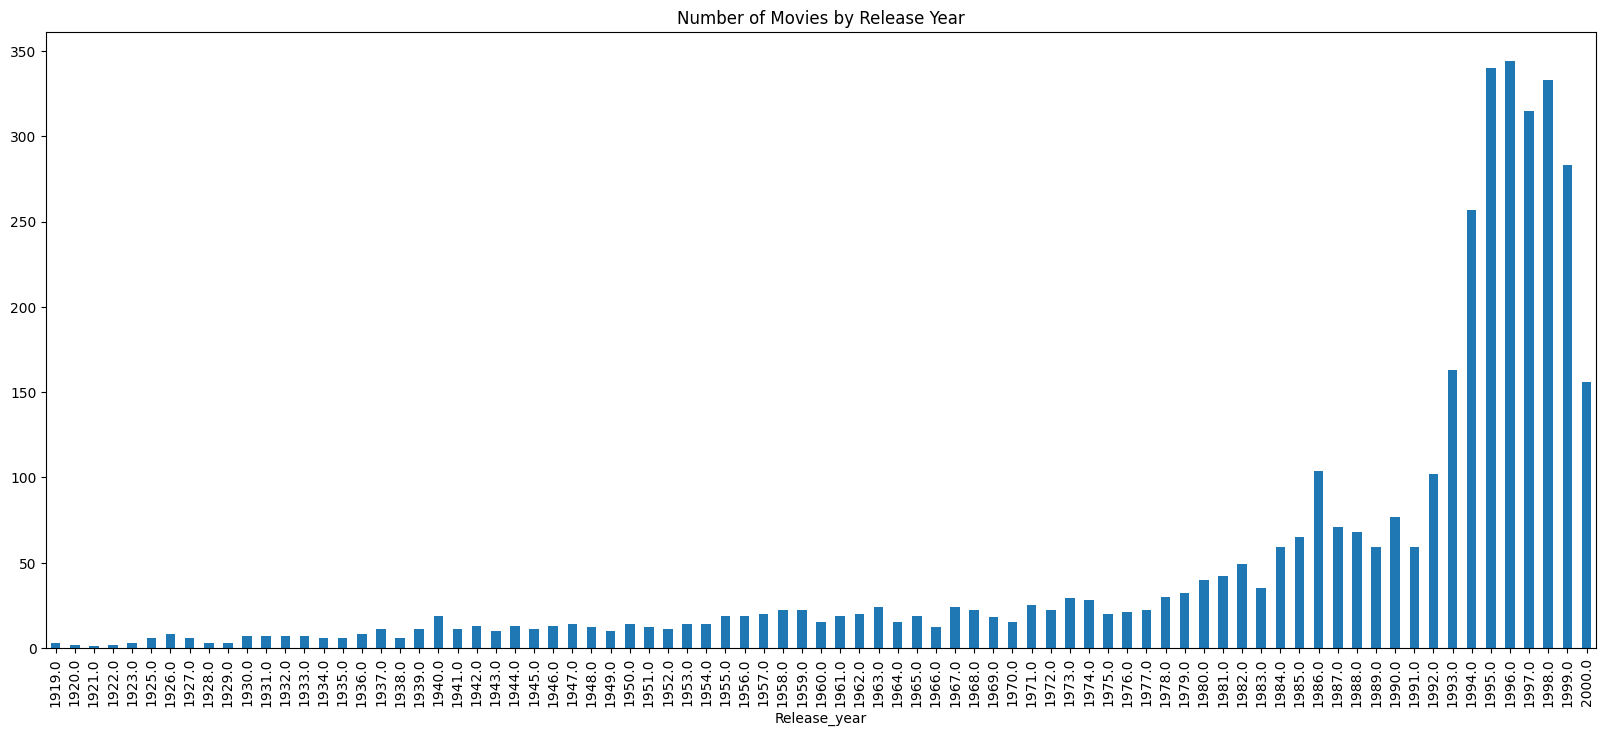

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
final_data.groupby("Release_year")["Title"].nunique().plot(kind="bar")
plt.title('Number of Movies by Release Year')
plt.show()

In [ ]:
m.head(3)

Genres   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
MovieID                                                                         
1             0          0          1           1       1      0            0   
10            1          1          0           0       0      0            0   
100           0          0          0           0       0      0            0   

Genres   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Other  Romance  \
MovieID                                                                        
1            0        0          0       0        0        0      0        0   
10           0        0          0       0        0        0      0        0   
100          1        0          0       0        0        0      0        0   

Genres   Sci-Fi  Thriller  War  Western  
MovieID                                  
1             0         0    0        0  
10            0         1    0        0  
100           0         1    0        0

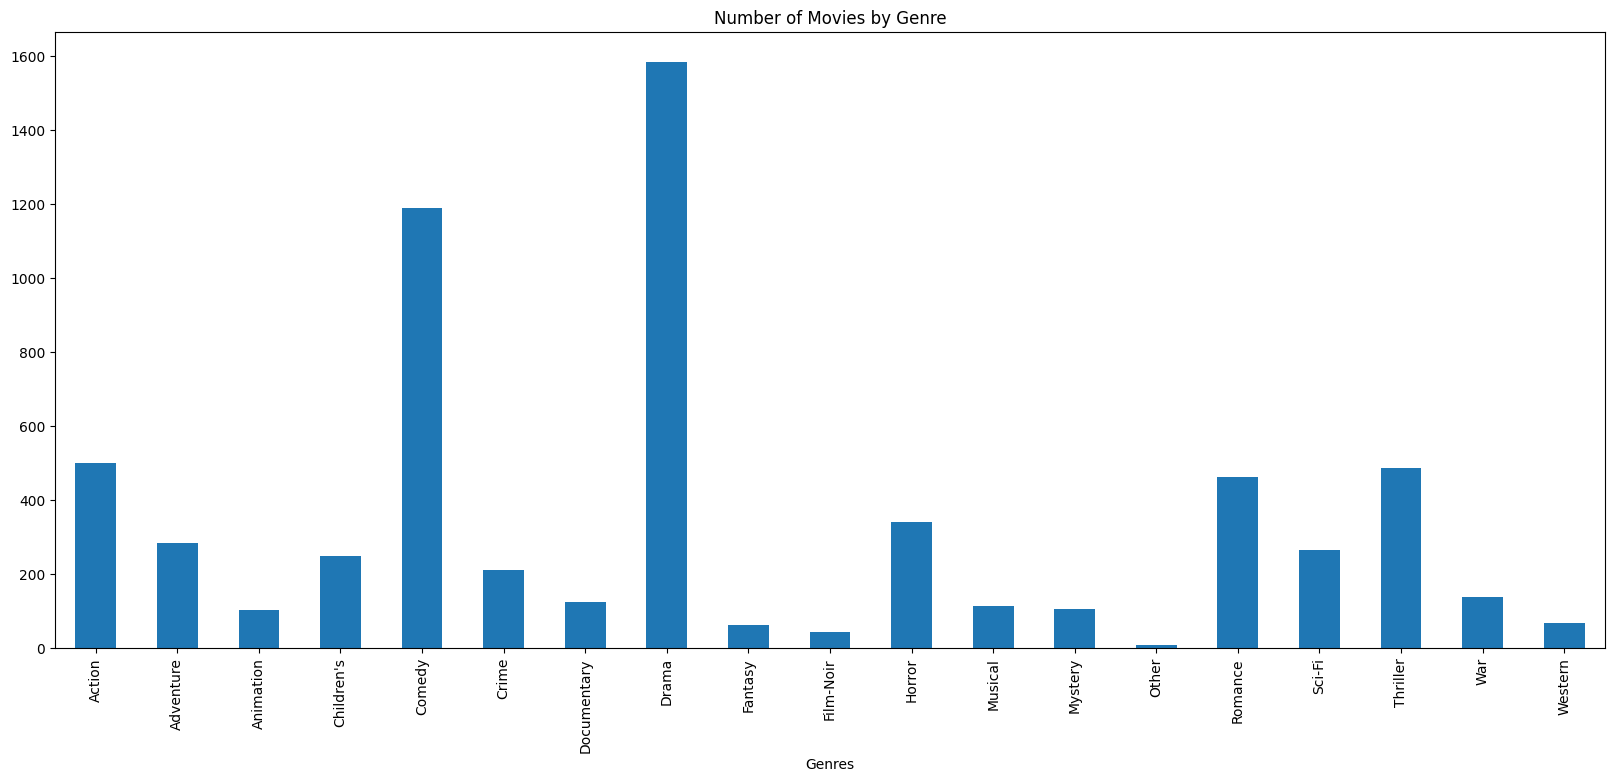

In [ ]:
m.sum(axis=0).plot(kind='bar')
plt.title('Number of Movies by Genre')
plt.show()

In [ ]:
gender_rating = final_data.groupby("Gender")["Rating"].count() / final_data["Rating"].count() * 100
gender_rating

Gender
F    24.63885
M    75.36115
Name: Rating, dtype: float64

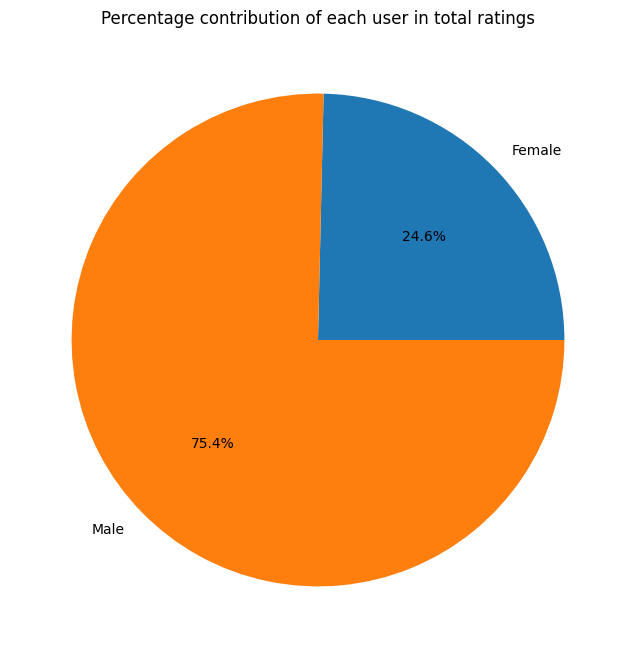

In [ ]:
plt.pie(gender_rating, labels = ["Female", "Male"],autopct='%1.1f%%')
plt.title('Percentage contribution of each user in total ratings')
plt.show()

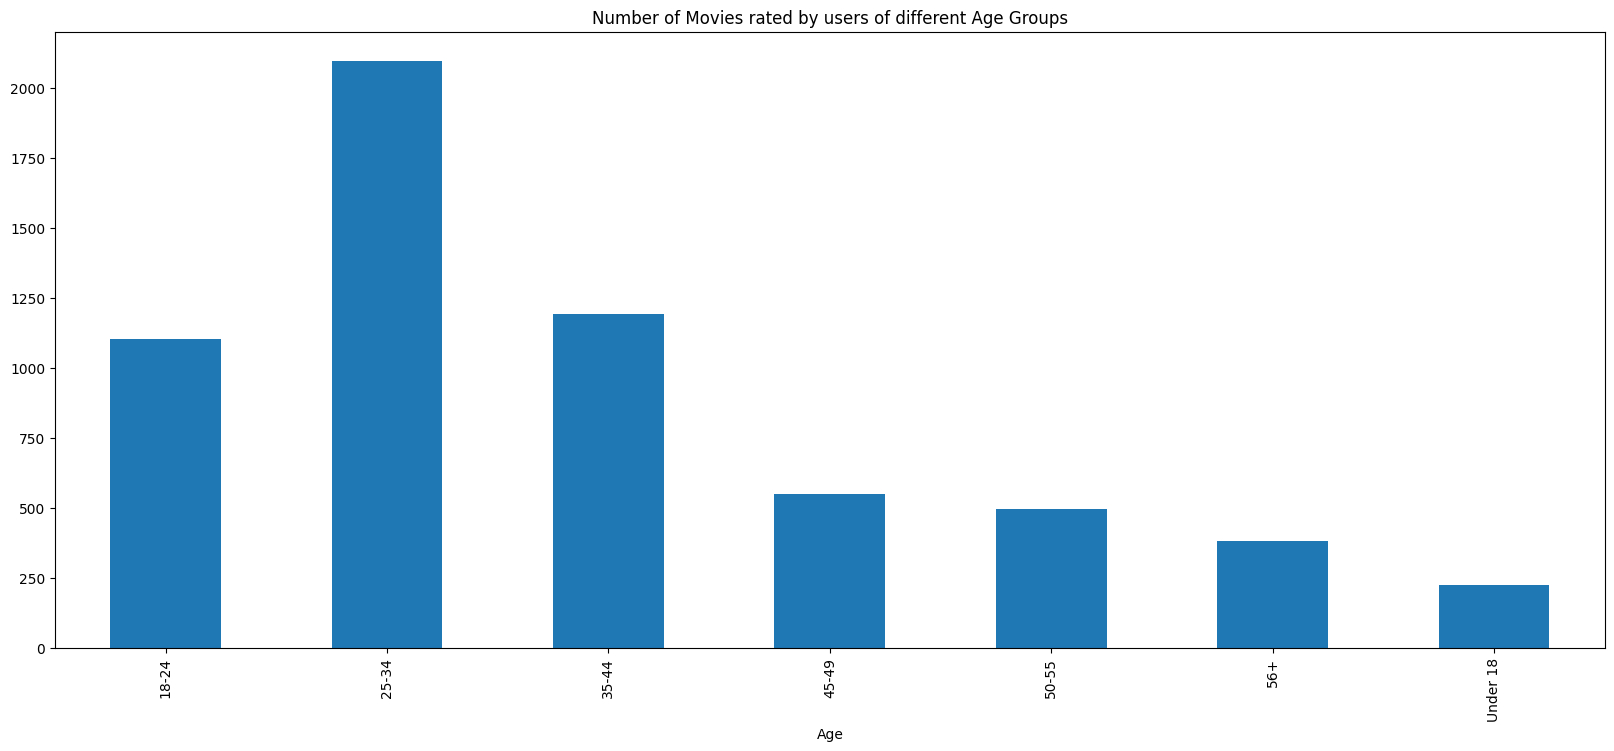

In [ ]:
final_data.groupby("Age")["UserID"].nunique().plot(kind="bar")
plt.title('Number of Movies rated by users of different Age Groups')
plt.show()

<font size = '5'>
Insight

- "25-34" age group have rated and watched the maximum number of movies.

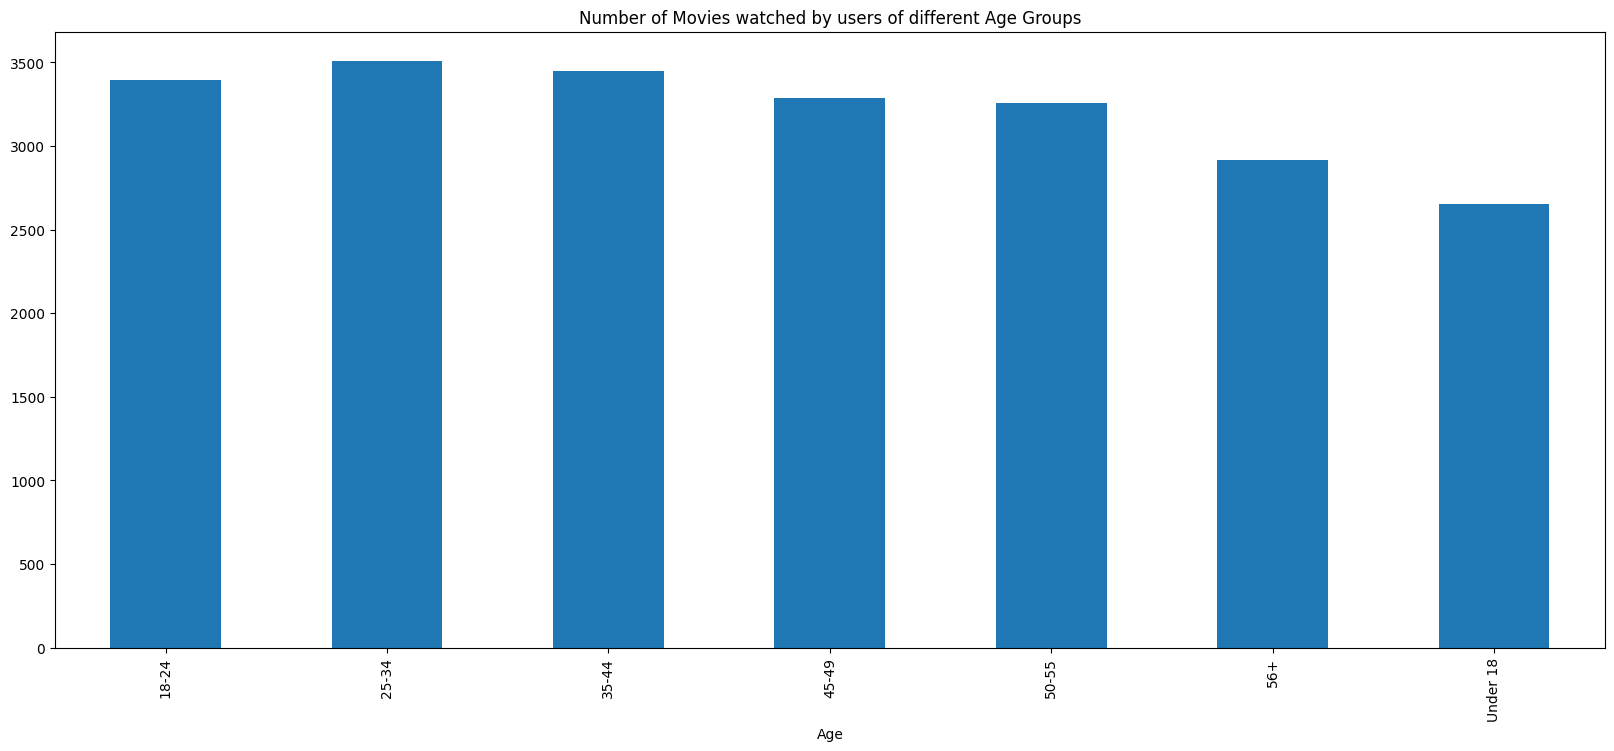

In [ ]:
final_data.groupby("Age")["MovieID"].nunique().plot(kind="bar")
plt.title('Number of Movies watched by users of different Age Groups')
plt.show()

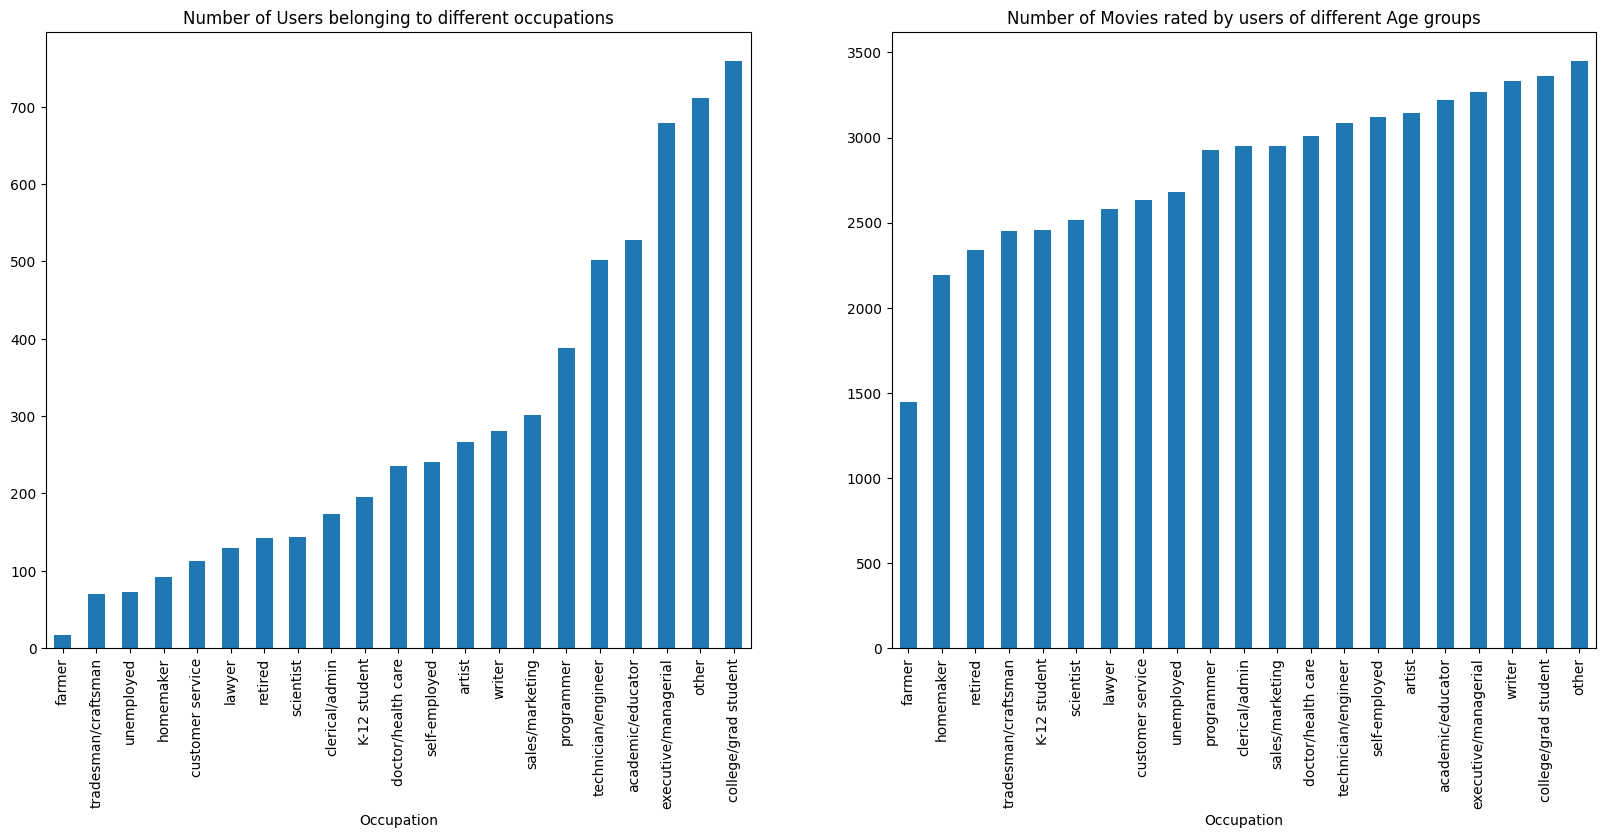

In [ ]:
plt.subplot(1,2,1)
final_data.groupby("Occupation")["UserID"].nunique().sort_values().plot(kind="bar")
plt.title('Number of Users belonging to different occupations')

plt.subplot(1,2,2)
final_data.groupby("Occupation")["MovieID"].nunique().sort_values().plot(kind="bar")
plt.title('Number of Movies rated by users of different Age groups')
plt.show()

<font size='5'>
Insight

- Majority of the Users are College Graduates and Students , followed by Executives, educators and engineers.

- Maximum movies are watched and rated by users belonging to occupations such as College graduate students , writers , executives, educator and artists.

<font size='5'>
Top 5 occupations

In [ ]:
pd.DataFrame(final_data.groupby("Occupation")["MovieID"].nunique().sort_values(ascending = False)[1:6]).rename(columns = {"MovieID":"Number of Movies"})

Number of Movies
Occupation                            
college/grad student              3363
writer                            3330
executive/managerial              3269
academic/educator                 3218
artist                            3145

In [ ]:
top_5_occ = final_data.groupby("Occupation")["MovieID"].nunique().sort_values(ascending = False)[1:6].index
top_5_occ

Index(['college/grad student', 'writer', 'executive/managerial',
       'academic/educator', 'artist'],
      dtype='object', name='Occupation')

<font size='5'>
Let's analyse the interaction between users of these top 5 occupations and movies

In [ ]:
final_data.head(3)

UserID Gender       Age    Occupation Zipcode  MovieID        Title  \
0     1.0      F  Under 18  K-12 student   48067        1   Toy Story    
1     1.0      F  Under 18  K-12 student   48067       48  Pocahontas    
2     1.0      F  Under 18  K-12 student   48067      150   Apollo 13    

   Release_year Rating  Watch_Hour  ...  Film-Noir  Horror  Musical  Mystery  \
0        1995.0      5        23.0  ...        0.0     0.0      0.0      0.0   
1        1995.0      5        23.0  ...        0.0     0.0      1.0      0.0   
2        1995.0      5        22.0  ...        0.0     0.0      0.0      0.0   

   Other  Romance  Sci-Fi  Thriller  War  Western  
0    0.0      0.0     0.0       0.0  0.0      0.0  
1    0.0      1.0     0.0       0.0  0.0      0.0  
2    0.0      0.0     0.0       0.0  0.0      0.0  

[3 rows x 29 columns]

In [ ]:
final_data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'MovieID', 'Title',
       'Release_year', 'Rating', 'Watch_Hour', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Other',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
np.argsort((final_data.groupby("Occupation")['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime','Documentary', 'Drama', 'Fantasy',
                                             'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Other', 'Romance', 'Sci-Fi', 'Thriller', 'War',
                                             'Western'].mean())*100,axis = 1).loc[["writer","artist","academic/educator","executive/managerial","college/grad student"]]

<font size='5'>
Insight

- Writers , artists and educator most preferes to watch Animation, Fantasy and Science Fiction movies, followed by Romance , Action and rest of the genres.

- College Students most prefer to watch Children's , Science Fiction, Romance and Fantasy movies.

- Film-Noir is more prefered by the educators and Executive occupation users.

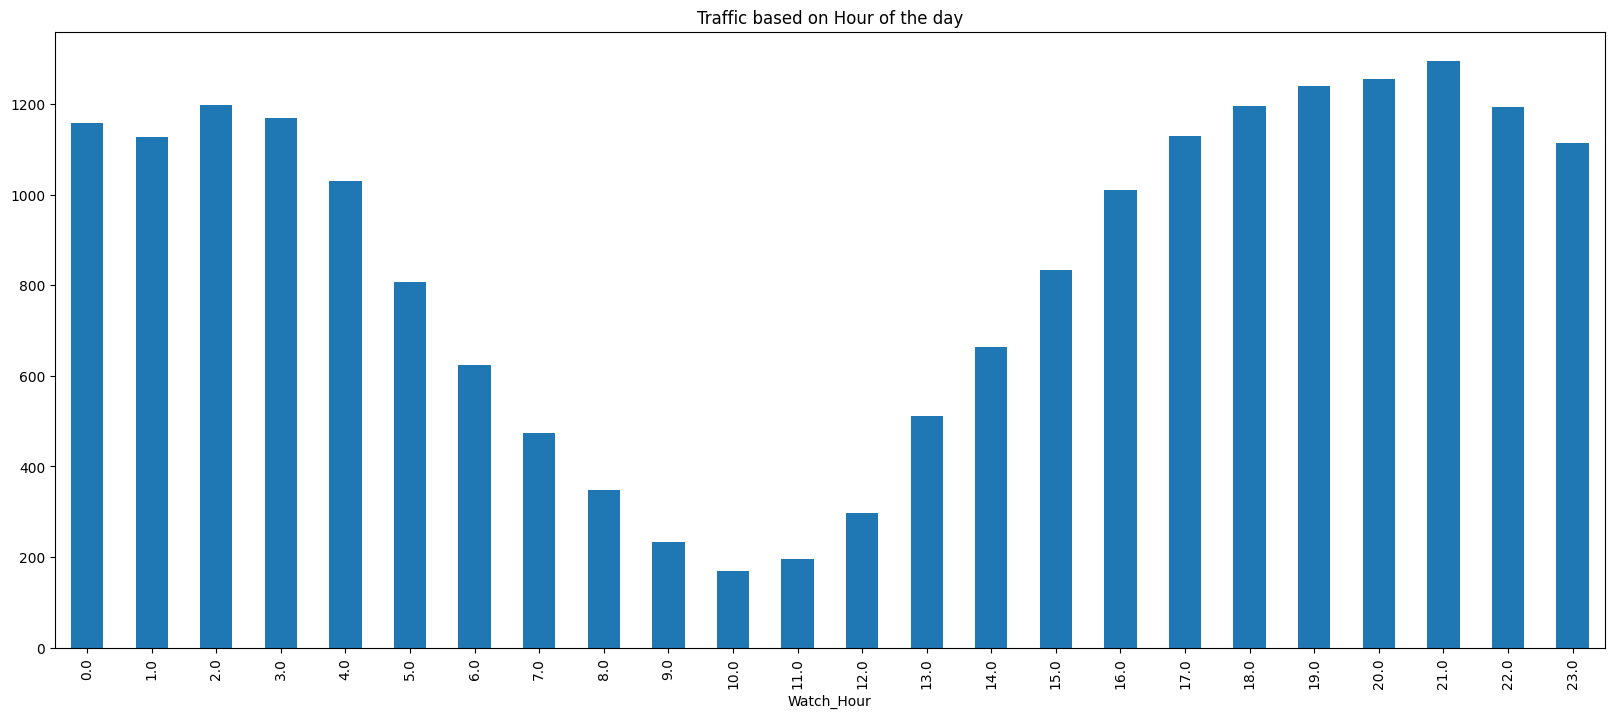

In [ ]:
final_data.groupby("Watch_Hour")["UserID"].nunique().plot(kind="bar")
plt.title('Traffic based on Hour of the day')
plt.show()

<font size='5'>
Top 10 movies that have got the most number of ratings

In [ ]:
top10_movies = final_data.groupby("Title")["Rating"].count().reset_index().sort_values(by="Rating",ascending=False).head(10)
top10_movies

Title  Rating
127                                  American Beauty     3428
3261              Star Wars: Episode IV - A New Hope     2991
3262  Star Wars: Episode V - The Empire Strikes Back     2990
3263      Star Wars: Episode VI - Return of the Jedi     2883
1846                                   Jurassic Park     2672
2994                             Saving Private Ryan     2653
3405                      Terminator 2: Judgment Day     2649
2186                                     Matrix, The     2590
262                               Back to the Future     2583
3090                       Silence of the Lambs, The     2578

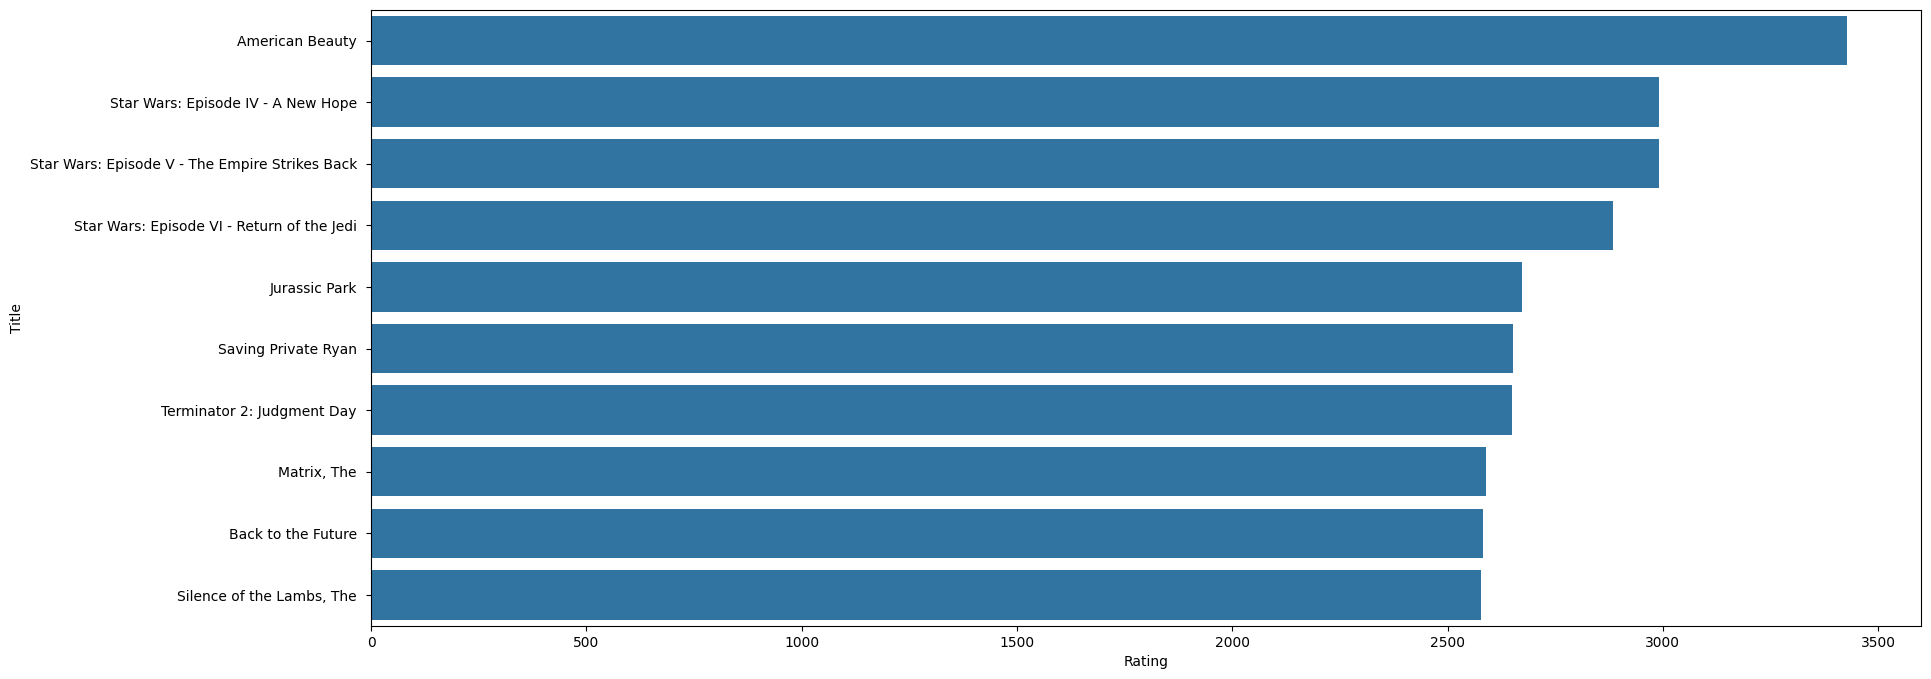

In [ ]:
sns.barplot(x = top10_movies["Rating"], y = top10_movies["Title"])
plt.show()

<font size='5'>
5 Top rated movies in each Genre

In [ ]:
final_data.head(3)

UserID Gender       Age    Occupation Zipcode  MovieID        Title  \
0     1.0      F  Under 18  K-12 student   48067        1   Toy Story    
1     1.0      F  Under 18  K-12 student   48067       48  Pocahontas    
2     1.0      F  Under 18  K-12 student   48067      150   Apollo 13    

   Release_year Rating  Watch_Hour  ...  Film-Noir  Horror  Musical  Mystery  \
0        1995.0      5        23.0  ...        0.0     0.0      0.0      0.0   
1        1995.0      5        23.0  ...        0.0     0.0      1.0      0.0   
2        1995.0      5        22.0  ...        0.0     0.0      0.0      0.0   

   Other  Romance  Sci-Fi  Thriller  War  Western  
0    0.0      0.0     0.0       0.0  0.0      0.0  
1    0.0      1.0     0.0       0.0  0.0      0.0  
2    0.0      0.0     0.0       0.0  0.0      0.0  

[3 rows x 29 columns]

In [ ]:
Genres = m.columns.values
Genres

array(['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Other', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'], dtype=object)

In [ ]:
for G in Genres:
  print("-"*60)
  print(G)
  print("-"*60)
  print(final_data[final_data[G] == 1].groupby("Title")["Rating"].count().sort_values(ascending=False).head())
  print()

------------------------------------------------------------
Action
------------------------------------------------------------
Title
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
Saving Private Ryan                                2653
Name: Rating, dtype: int64

------------------------------------------------------------
Adventure
------------------------------------------------------------
Title
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
Men in Black                                       2538
Name: Rating, dtype: int64

------------------------------------------------------------
Animation
----------------------------------------

<font size='5'>
Top 5 movies recommended for each Age_Group based on their ratings provided by that group

In [ ]:
age_groups = final_data.Age.unique()
age_groups

array(['Under 18', '56+', '25-34', '45-49', '50-55', '35-44', '18-24',
       nan], dtype=object)

In [ ]:
for age in age_groups:
  print("-"*60)
  print(age)
  print("-"*60)
  print(final_data[final_data['Age'] == age].groupby("Title")["Rating"].count().sort_values(ascending=False).head())
  print()

------------------------------------------------------------
Under 18
------------------------------------------------------------
Title
Toy Story                                      112
Sixth Sense, The                               109
Star Wars: Episode IV - A New Hope             101
Men in Black                                   100
Star Wars: Episode VI - Return of the Jedi     100
Name: Rating, dtype: int64

------------------------------------------------------------
56+
------------------------------------------------------------
Title
American Beauty         184
Schindler's List        137
Shakespeare in Love     136
Godfather, The          122
Saving Private Ryan     121
Name: Rating, dtype: int64

------------------------------------------------------------
25-34
------------------------------------------------------------
Title
American Beauty                                    1334
Star Wars: Episode V - The Empire Strikes Back     1176
Star Wars: Episode VI - Return of 

# Item Item similarity(hamming distance) based recommendation :

In [ ]:
m = movies[["MovieID","Title","Genres"]]
m["Genres"] = m["Genres"].str.split("|")
m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"":"Other","Horro":"Horror","Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi","Dr":"Drama",
                                   "Documenta":"Documentary", "Wester":"Western","Fant":"Fantasy","Chil":"Children's",
                                   "R":"Romance","D":"Drama","Rom":"Romance","Animati":"Animation","Childr":"Children's",
                                   "Childre":"Children's", "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi",
                                   "Roma":"Romance","A":"Adventure","Children":"Children's","Adventu":"Adventure","Adv":"Adventure",
                                   "Wa":"War","Thrille"  :"Thriller","Com":"Comedy","Comed":"Comedy","Acti":"Action",
                                   "Advent":"Adventure","Adventur":"Adventure","Thri":"Thriller", "Chi":"Children's",
                                   "Ro":"Romance","F":"Fantasy","We":"Western","Documen":"Documentary","Music":"Musical",
                                   "Children":"Children's" ,"Horr":"Horror", "Children'":"Children's","Roman":"Romance",
                                   "Docu":"Documentary","Th":"Thriller","Document":"Documentary"})

m = m.pivot_table(values="Title", index="MovieID", columns="Genres", aggfunc= np.size,).fillna(0)
m.head()

Genres   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
MovieID                                                                         
1           0.0        0.0        1.0         1.0     1.0    0.0          0.0   
10          1.0        1.0        0.0         0.0     0.0    0.0          0.0   
100         0.0        0.0        0.0         0.0     0.0    0.0          0.0   
1000        0.0        0.0        0.0         0.0     0.0    1.0          0.0   
1001        0.0        0.0        0.0         0.0     1.0    0.0          0.0   

Genres   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Other  Romance  \
MovieID                                                                        
1          0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
10         0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
100        1.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
1000       0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
1001       0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   

Genres   Sci-Fi  Thriller  War  Western  
MovieID                                  
1           0.0       0.0  0.0      0.0  
10          0.0       1.0  0.0      0.0  
100         0.0       1.0  0.0      0.0  
1000        0.0       0.0  0.0      0.0  
1001        0.0       0.0  0.0      0.0

In [ ]:
def apply(x):
  if x >= 1:
    return 1
  else:
    return 0

m["Adventure"] = m["Adventure"].apply(apply)
m = m.astype(int)

In [ ]:
m

Genres   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
MovieID                                                                         
1             0          0          1           1       1      0            0   
10            1          1          0           0       0      0            0   
100           0          0          0           0       0      0            0   
1000          0          0          0           0       0      1            0   
1001          0          0          0           0       1      0            0   
...         ...        ...        ...         ...     ...    ...          ...   
994           0          0          0           0       0      0            0   
996           1          0          0           0       0      0            0   
997           0          0          0           0       0      0            0   
998           1          0          0           0       0      1            0   
999           0          0          0           0       0      1            0   

Genres   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Other  Romance  \
MovieID                                                                        
1            0        0          0       0        0        0      0        0   
10           0        0          0       0        0        0      0        0   
100          1        0          0       0        0        0      0        0   
1000         0        0          0       0        0        0      0        0   
1001         0        0          0       0        0        0      0        0   
...        ...      ...        ...     ...      ...      ...    ...      ...   
994          1        0          0       0        0        0      0        0   
996          1        0          0       0        0        0      0        0   
997          1        0          0       0        0        0      0        0   
998          0        0          0       0        0        0      0        0   
999          0        0          0       0        0        0      0        0   

Genres   Sci-Fi  Thriller  War  Western  
MovieID                                  
1             0         0    0        0  
10            0         1    0        0  
100           0         1    0        0  
1000          0         0    0        0  
1001          0         0    0        0  
...         ...       ...  ...      ...  
994           0         0    0        0  
996           0         0    0        1  
997           0         1    0        0  
998           0         0    0        0  
999           0         0    0        0  

[3858 rows x 19 columns]

In [ ]:
def Hamming_distance(x1,x2):
  return np.sum(abs(x1-x2))

In [ ]:
Ranks = []
Query = "1"
for movie_id in m.index:
  if movie_id == Query:
    continue
  Ranks.append([Query,movie_id,Hamming_distance(m.loc[Query],m.loc[movie_id])])

In [ ]:
Ranks = pd.DataFrame(Ranks,columns=["Query","Candidate","Hamming_distance"])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Query', right_on='MovieID').rename(columns={'Title': 'query_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Candidate', right_on='MovieID').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.sort_values(by=['Query', 'Hamming_distance'])

Ranks.head(10)


Query Candidate  Hamming_distance query_tittle  \
71       1      1064               0.0   Toy Story    
1208     1      2141               0.0   Toy Story    
1442     1      2354               0.0   Toy Story    
1443     1      2355               0.0   Toy Story    
2281     1      3114               0.0   Toy Story    
2831     1      3611               0.0   Toy Story    
2981     1      3751               0.0   Toy Story    
7        1      1005               1.0   Toy Story    
13       1      1010               1.0   Toy Story    
19       1      1016               1.0   Toy Story    

                      candidate_tittle  
71    Aladdin and the King of Thieves   
1208                American Tail, An   
1442               Rugrats Movie, The   
1443                    Bug's Life, A   
2281                      Toy Story 2   
2831                   Saludos Amigos   
2981                      Chicken Run   
7                D3: The Mighty Ducks   
13                      Love Bug, The   
19                    Shaggy Dog, The

#User-Item Interaction Matrix

## Creating a user Movie average rating Matrix :

In [ ]:
df_.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'MovieID', 'Title',
       'Genres', 'Release_year', 'Rating', 'Watch_Hour', 'Released_In'],
      dtype='object')

In [ ]:
user_movie_rating_matrix = pd.pivot_table(df_,index = "UserID", columns = "Title", values = "Rating", aggfunc = "mean").fillna(0)
user_movie_rating_matrix.shape

(6040, 3633)

In [ ]:
user_movie_rating_matrix

Title   $1,000,000 Duck   'Night Mother   'Til There Was You   'burbs, The   \
UserID                                                                        
1                    0.0             0.0                  0.0           0.0   
10                   0.0             0.0                  0.0           4.0   
100                  0.0             0.0                  0.0           0.0   
1000                 0.0             0.0                  0.0           0.0   
1001                 0.0             0.0                  0.0           0.0   
...                  ...             ...                  ...           ...   
995                  0.0             0.0                  0.0           0.0   
996                  0.0             0.0                  0.0           0.0   
997                  0.0             0.0                  0.0           0.0   
998                  0.0             0.0                  0.0           0.0   
999                  0.0             0.0                  0.0           0.0   

Title   ...And Justice for All   1-900   10 Things I Hate About You   \
UserID                                                                 
1                           0.0     0.0                          0.0   
10                          0.0     0.0                          0.0   
100                         0.0     0.0                          0.0   
1000                        0.0     0.0                          0.0   
1001                        0.0     0.0                          0.0   
...                         ...     ...                          ...   
995                         0.0     0.0                          0.0   
996                         0.0     0.0                          0.0   
997                         0.0     0.0                          0.0   
998                         0.0     0.0                          0.0   
999                         3.0     0.0                          0.0   

Title   101 Dalmatians   12 Angry Men   13th Warrior, The   ...  \
UserID                                                      ...   
1                   0.0            0.0                 0.0  ...   
10                  0.0            3.0                 4.0  ...   
100                 0.0            0.0                 0.0  ...   
1000                4.0            0.0                 0.0  ...   
1001                3.0            0.0                 0.0  ...   
...                 ...            ...                 ...  ...   
995                 0.0            0.0                 0.0  ...   
996                 0.0            5.0                 0.0  ...   
997                 0.0            0.0                 0.0  ...   
998                 0.0            0.0                 0.0  ...   
999                 0.0            0.0                 0.0  ...   

Title   Young Poisoner's Handbook, The   Young Sherlock Holmes   \
UserID                                                            
1                                   0.0                     0.0   
10                                  0.0                     0.0   
100                                 0.0                     0.0   
1000                                0.0                     0.0   
1001                                0.0                     0.0   
...                                 ...                     ...   
995                                 0.0                     0.0   
996                                 0.0                     4.0   
997                                 0.0                     0.0   
998                                 0.0                     0.0   
999                                 0.0                     0.0   

Title   Young and Innocent   Your Friends and Neighbors   Zachariah   \
UserID                                                                 
1                       0.0                          0.0         0.0   
10                      0.0                          0.0         0.0   
100

##Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

###Item Similarity

In [ ]:
Item_similarity = cosine_similarity(user_movie_rating_matrix.T)
Item_similarity

array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

In [ ]:
Item_similarty_matrix = pd.DataFrame(Item_similarity, index = user_movie_rating_matrix.columns, columns = user_movie_rating_matrix.columns)
Item_similarty_matrix

Title                    $1,000,000 Duck   'Night Mother   \
Title                                                       
$1,000,000 Duck                  1.000000        0.072357   
'Night Mother                    0.072357        1.000000   
'Til There Was You               0.037011        0.115290   
'burbs, The                      0.079291        0.115545   
...And Justice for All           0.060838        0.159526   
...                                   ...             ...   
Zed & Two Noughts, A             0.045280        0.091150   
Zero Effect                      0.039395        0.074787   
Zero Kelvin                      0.000000        0.000000   
Zeus and Roxanne                 0.120242        0.000000   
eXistenZ                         0.027003        0.077807   

Title                    'Til There Was You   'burbs, The   \
Title                                                        
$1,000,000 Duck                     0.037011      0.079291   
'Night Mother                       0.115290      0.115545   
'Til There Was You                  1.000000      0.098756   
'burbs, The                         0.098756      1.000000   
...And Justice for All              0.066301      0.143620   
...                                      ...           ...   
Zed & Two Noughts, A                0.022594      0.055704   
Zero Effect                         0.079261      0.161174   
Zero Kelvin                         0.000000      0.000000   
Zeus and Roxanne                    0.047526      0.033567   
eXistenZ                            0.063284      0.110525   

Title                    ...And Justice for All     1-900   \
Title                                                        
$1,000,000 Duck                         0.060838  0.000000   
'Night Mother                           0.159526  0.000000   
'Til There Was You                      0.066301  0.080250   
'burbs, The                             0.143620  0.000000   
...And Justice for All                  1.000000  0.000000   
...                                          ...       ...   
Zed & Two Noughts, A                    0.086080  0.000000   
Zero Effect                             0.110867  0.000000   
Zero Kelvin                             0.074317  0.000000   
Zeus and Roxanne                        0.000000  0.000000   
eXistenZ                                0.111040  0.039561   

Title                    10 Things I Hate About You   101 Dalmatians   \
Title                                                                   
$1,000,000 Duck                             0.058619         0.189843   
'Night Mother                               0.076798         0.137135   
'Til There Was You                          0.127895         0.128523   
'burbs, The                                 0.192191         0.250140   
...And Justice for All                      0.075093         0.178928   
...                                              ...              ...   
Zed & Two Noughts, A                        0.012702         0.042295   
Zero Effect                                 0.175771         0.157313   
Zero Kelvin                                 0.000000         0.033120   
Zeus and Roxanne                            0.058708         0.089840   
eXistenZ                                    0.162060         0.120762   

Title                    12 Angry Men   13th Warrior, The   ...  \
Title                                                       ...   
$1,000,000 Duck               0.094785            0.058418  ...   
'Night Mother                 0.111413            0.046135  ...   
'Til There Was You            0.079115            0.066598  ...   
'burbs, The                   0.170719            0.197808  ...   
...And Justice for All        0.205486            0.122431  ...   
...                                ...                 ...  ...   
Zed & Two Noughts, A          0.039344            0.041324  ...   
Zero Effect                   0.133061 

In [ ]:
Item_similarty_matrix.T

Title                    $1,000,000 Duck   'Night Mother   \
Title                                                       
$1,000,000 Duck                  1.000000        0.072357   
'Night Mother                    0.072357        1.000000   
'Til There Was You               0.037011        0.115290   
'burbs, The                      0.079291        0.115545   
...And Justice for All           0.060838        0.159526   
...                                   ...             ...   
Zed & Two Noughts, A             0.045280        0.091150   
Zero Effect                      0.039395        0.074787   
Zero Kelvin                      0.000000        0.000000   
Zeus and Roxanne                 0.120242        0.000000   
eXistenZ                         0.027003        0.077807   

Title                    'Til There Was You   'burbs, The   \
Title                                                        
$1,000,000 Duck                     0.037011      0.079291   
'Night Mother                       0.115290      0.115545   
'Til There Was You                  1.000000      0.098756   
'burbs, The                         0.098756      1.000000   
...And Justice for All              0.066301      0.143620   
...                                      ...           ...   
Zed & Two Noughts, A                0.022594      0.055704   
Zero Effect                         0.079261      0.161174   
Zero Kelvin                         0.000000      0.000000   
Zeus and Roxanne                    0.047526      0.033567   
eXistenZ                            0.063284      0.110525   

Title                    ...And Justice for All     1-900   \
Title                                                        
$1,000,000 Duck                         0.060838  0.000000   
'Night Mother                           0.159526  0.000000   
'Til There Was You                      0.066301  0.080250   
'burbs, The                             0.143620  0.000000   
...And Justice for All                  1.000000  0.000000   
...                                          ...       ...   
Zed & Two Noughts, A                    0.086080  0.000000   
Zero Effect                             0.110867  0.000000   
Zero Kelvin                             0.074317  0.000000   
Zeus and Roxanne                        0.000000  0.000000   
eXistenZ                                0.111040  0.039561   

Title                    10 Things I Hate About You   101 Dalmatians   \
Title                                                                   
$1,000,000 Duck                             0.058619         0.189843   
'Night Mother                               0.076798         0.137135   
'Til There Was You                          0.127895         0.128523   
'burbs, The                                 0.192191         0.250140   
...And Justice for All                      0.075093         0.178928   
...                                              ...              ...   
Zed & Two Noughts, A                        0.012702         0.042295   
Zero Effect                                 0.175771         0.157313   
Zero Kelvin                                 0.000000         0.033120   
Zeus and Roxanne                            0.058708         0.089840   
eXistenZ                                    0.162060         0.120762   

Title                    12 Angry Men   13th Warrior, The   ...  \
Title                                                       ...   
$1,000,000 Duck               0.094785            0.058418  ...   
'Night Mother                 0.111413            0.046135  ...   
'Til There Was You            0.079115            0.066598  ...   
'burbs, The                   0.170719            0.197808  ...   
...And Justice for All        0.205486            0.122431  ...   
...                                ...                 ...  ...   
Zed & Two Noughts, A          0.039344            0.041324  ...   
Zero Effect                   0.133061 

In [ ]:
def recommend_movie_based_on_item_similarity(movie):
    movie_info = movies[movies['Title'] == movie].iloc[0]
    TITLE = movie_info['Title']
    INDEX = movie_info['MovieID']

    print(f'Movies similar to {TITLE} (index - {INDEX}) are:')
    similar_movies = Item_similarty_matrix[TITLE].sort_values(ascending=False)[1:11]
    recommended_titles = movies[movies['Title'].isin(similar_movies.index)]['Title']

    for title in recommended_titles:
      print(title)

In [ ]:
recommend_movie_based_on_item_similarity('Liar Liar ')

Movies similar to Liar Liar  (index - 1485) are:
Dumb & Dumber 
Ace Ventura: Pet Detective 
Mask, The 
Mrs. Doubtfire 
Home Alone 
Austin Powers: International Man of Mystery 
Wedding Singer, The 
There's Something About Mary 
Wayne's World 
League of Their Own, A 


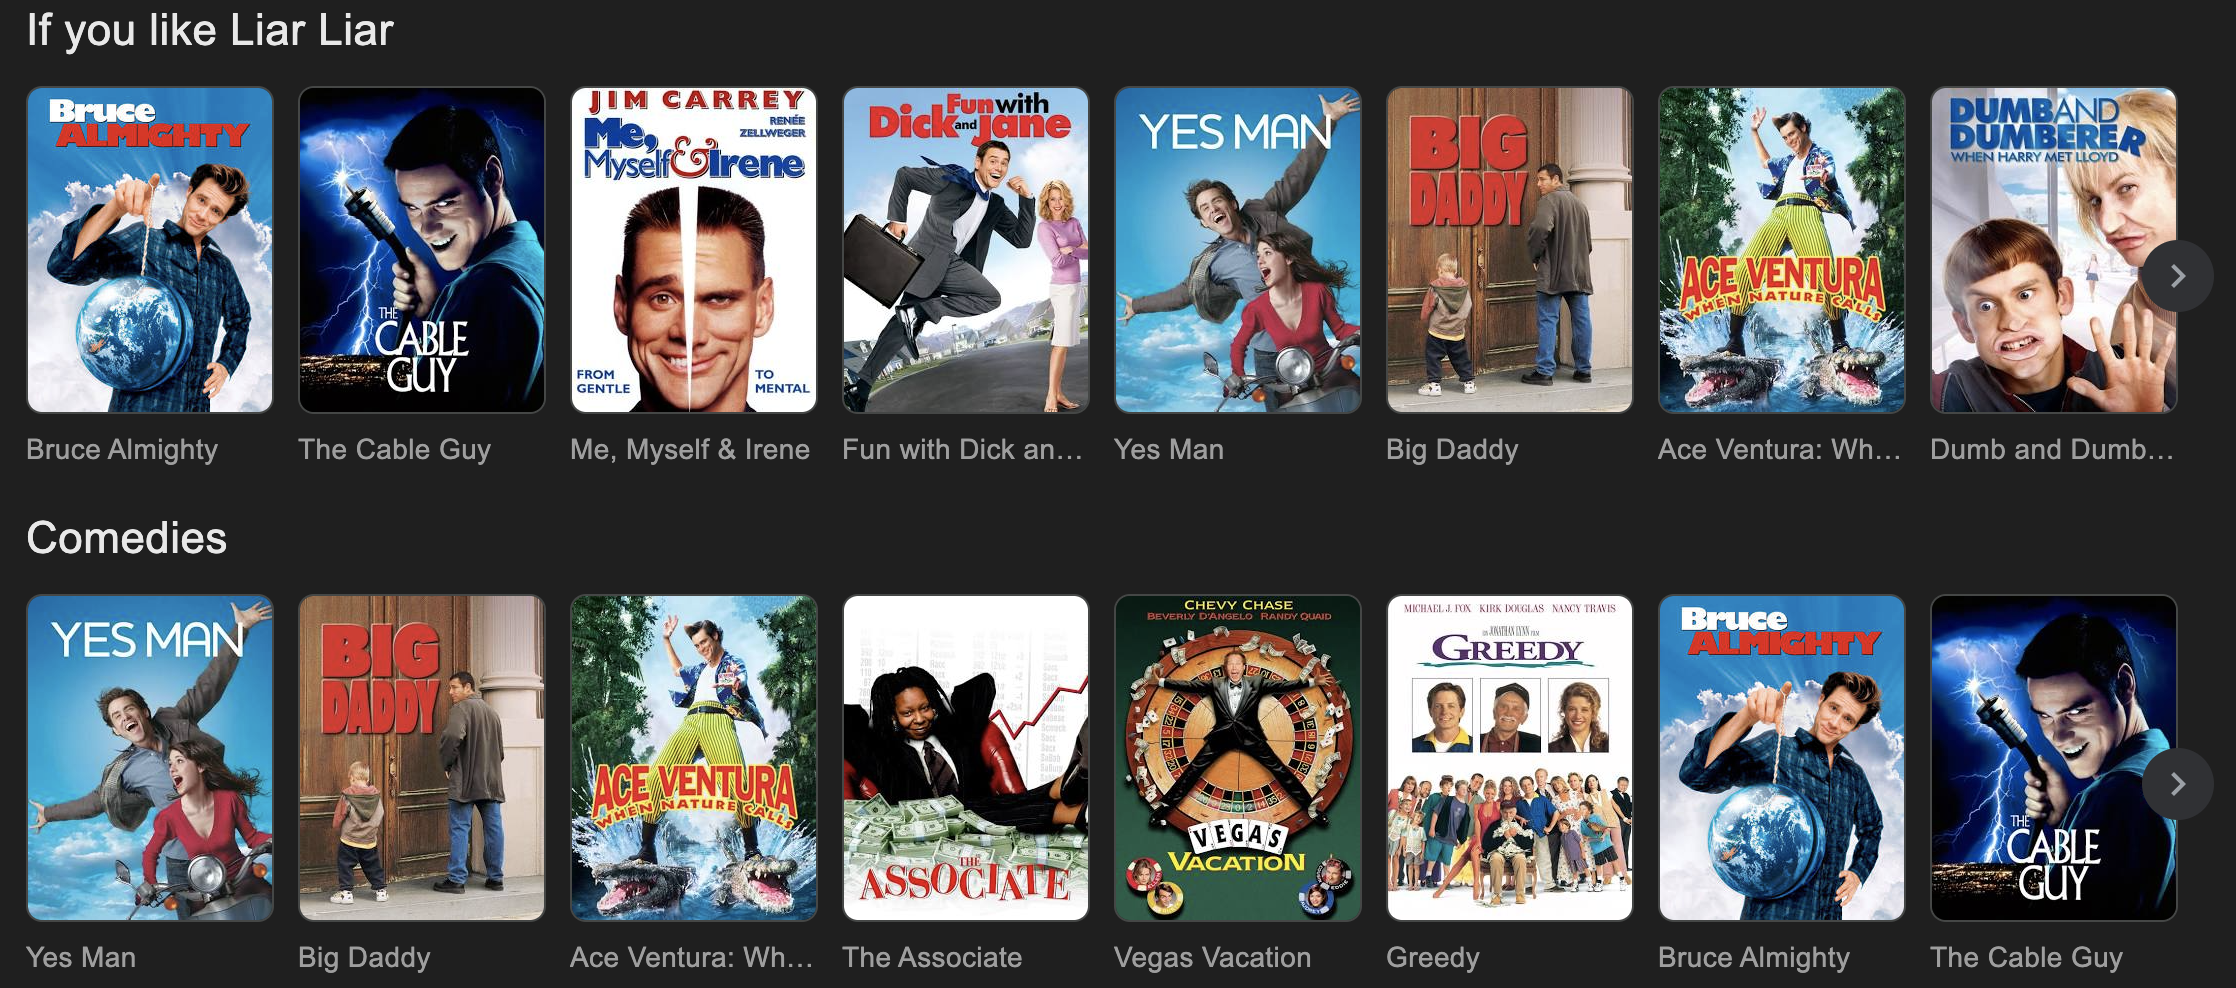

###User Similarity

In [ ]:
User_similarity = cosine_similarity(user_movie_rating_matrix)
User_similarity.shape

(6040, 6040)

In [ ]:
User_similarity

array([[1.        , 0.25531859, 0.12396703, ..., 0.15926709, 0.11935626,
        0.12239079],
       [0.25531859, 1.        , 0.25964457, ..., 0.16569953, 0.13332665,
        0.24845029],
       [0.12396703, 0.25964457, 1.        , ..., 0.20430203, 0.11352239,
        0.30693676],
       ...,
       [0.15926709, 0.16569953, 0.20430203, ..., 1.        , 0.18657496,
        0.18563871],
       [0.11935626, 0.13332665, 0.11352239, ..., 0.18657496, 1.        ,
        0.10827118],
       [0.12239079, 0.24845029, 0.30693676, ..., 0.18563871, 0.10827118,
        1.        ]])

In [ ]:
User_similarity_matrix = pd.DataFrame(User_similarity, index = user_movie_rating_matrix.index, columns = user_movie_rating_matrix.index)
User_similarity_matrix

UserID         1        10       100      1000      1001      1002      1003  \
UserID                                                                         
1       1.000000  0.255319  0.123967  0.207800  0.139317  0.110320  0.121384   
10      0.255319  1.000000  0.259645  0.280479  0.158703  0.112917  0.141985   
100     0.123967  0.259645  1.000000  0.306067  0.075736  0.110450  0.358686   
1000    0.207800  0.280479  0.306067  1.000000  0.099117  0.047677  0.201722   
1001    0.139317  0.158703  0.075736  0.099117  1.000000  0.164854  0.053887   
...          ...       ...       ...       ...       ...       ...       ...   
995     0.035731  0.146552  0.033754  0.044404  0.109700  0.072578  0.031406   
996     0.170184  0.304806  0.344290  0.330748  0.222119  0.224779  0.185226   
997     0.159267  0.165700  0.204302  0.172803  0.103255  0.068980  0.170771   
998     0.119356  0.133327  0.113522  0.098456  0.269952  0.218905  0.141829   
999     0.122391  0.248450  0.306937  0.250564  0.178399  0.178474  0.198656   

UserID      1004      1005      1006  ...       990       991       992  \
UserID                                ...                                 
1       0.180226  0.103896  0.052816  ...  0.079367  0.038048  0.032136   
10      0.432536  0.194915  0.102487  ...  0.154412  0.186234  0.083739   
100     0.237492  0.172872  0.099147  ...  0.098235  0.097953  0.065152   
1000    0.355920  0.325966  0.130702  ...  0.170100  0.076779  0.000000   
1001    0.152057  0.138602  0.134710  ...  0.146270  0.026891  0.097011   
...          ...       ...       ...  ...       ...       ...       ...   
995     0.088838  0.061450  0.032265  ...  0.080559  0.252222  0.074207   
996     0.352014  0.287965  0.164045  ...  0.205186  0.086546  0.062523   
997     0.175488  0.106303  0.049536  ...  0.192642  0.030588  0.081380   
998     0.075538  0.112029  0.052900  ...  0.061241  0.074269  0.086398   
999     0.334470  0.164777  0.143866  ...  0.214809  0.085280  0.040307   

UserID       993       994       995       996       997       998       999  
UserID                                                                        
1       0.067631  0.070052  0.035731  0.170184  0.159267  0.119356  0.122391  
10      0.125894  0.118558  0.146552  0.304806  0.165700  0.133327  0.248450  
100     0.178664  0.271311  0.033754  0.344290  0.204302  0.113522  0.306937  
1000    0.200343  0.380741  0.044404  0.330748  0.172803  0.098456  0.250564  
1001    0.119609  0.092234  0.109700  0.222119  0.103255  0.269952  0.178399  
...          ...       ...       ...       ...       ...       ...       ...  
995     0.098705  0.048650  1.000000  0.063925  0.019459  0.075830  0.052571  
996     0.186441  0.217672  0.063925  1.000000  0.179404  0.178834  0.418466  
997     0.162615  0.110656  0.019459  0.179404  1.000000  0.186575  0.185639  
998     0.166462  0.018659  0.075830  0.178834  0.186575  1.000000  0.108271  
999     0.168252  0.161995  0.052571  0.418466  0.185639  0.108271  1.000000  

[6040 rows x 6040 columns]

###Pearson Correlation

In [ ]:
m.head(3)

Genres   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
MovieID                                                                         
1           0.0        0.0        1.0         1.0     1.0    0.0          0.0   
10          1.0        1.0        0.0         0.0     0.0    0.0          0.0   
100         0.0        0.0        0.0         0.0     0.0    0.0          0.0   

Genres   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Other  Romance  \
MovieID                                                                        
1          0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
10         0.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   
100        1.0      0.0        0.0     0.0      0.0      0.0    0.0      0.0   

Genres   Sci-Fi  Thriller  War  Western  
MovieID                                  
1           0.0       0.0  0.0      0.0  
10          0.0       1.0  0.0      0.0  
100         0.0       1.0  0.0      0.0

In [ ]:
correlated_movie_matrix = m.T.corr()
correlated_movie_matrix

MovieID         1        10       100      1000      1001      1002      1003  \
MovieID                                                                         
1        1.000000 -0.187500 -0.148522 -0.102062  0.544331  0.544331 -0.148522   
10      -0.187500  1.000000  0.321798 -0.102062 -0.102062 -0.102062  0.321798   
100     -0.148522  0.321798  1.000000 -0.080845 -0.080845 -0.080845  1.000000   
1000    -0.102062 -0.102062 -0.080845  1.000000 -0.055556 -0.055556 -0.080845   
1001     0.544331 -0.102062 -0.080845 -0.055556  1.000000  1.000000 -0.080845   
...           ...       ...       ...       ...       ...       ...       ...   
994     -0.102062 -0.102062  0.687184 -0.055556 -0.055556 -0.055556  0.687184   
996     -0.187500  0.208333  0.321798 -0.102062 -0.102062 -0.102062  0.321798   
997     -0.148522  0.321798  1.000000 -0.080845 -0.080845 -0.080845  1.000000   
998     -0.148522  0.321798 -0.117647  0.687184 -0.080845 -0.080845 -0.117647   
999     -0.102062 -0.102062 -0.080845  1.000000 -0.055556 -0.055556 -0.080845   

MovieID      1004      1005      1006  ...        99       990       991  \
MovieID                                ...                                 
1       -0.148522  0.792118 -0.102062  ... -0.102062 -0.187500 -0.148522   
10       0.792118 -0.148522 -0.102062  ... -0.102062  1.000000 -0.148522   
100      0.441176 -0.117647  0.687184  ... -0.080845  0.321798  0.441176   
1000    -0.080845 -0.080845 -0.055556  ... -0.055556 -0.102062 -0.080845   
1001    -0.080845  0.687184 -0.055556  ... -0.055556 -0.102062 -0.080845   
...           ...       ...       ...  ...       ...       ...       ...   
994     -0.080845 -0.080845  1.000000  ... -0.055556 -0.102062  0.687184   
996      0.321798 -0.148522  0.544331  ... -0.102062  0.208333  0.321798   
997      0.441176 -0.117647  0.687184  ... -0.080845  0.321798  0.441176   
998      0.441176 -0.117647 -0.080845  ... -0.080845  0.321798 -0.117647   
999     -0.080845 -0.080845 -0.055556  ... -0.055556 -0.102062 -0.080845   

MovieID       992       993       994       996       997       998       999  
MovieID                                                                        
1       -0.102062 -0.102062 -0.102062 -0.187500 -0.148522 -0.148522 -0.102062  
10       0.544331 -0.102062 -0.102062  0.208333  0.321798  0.321798 -0.102062  
100      0.687184  0.687184  0.687184  0.321798  1.000000 -0.117647 -0.080845  
1000    -0.055556 -0.055556 -0.055556 -0.102062 -0.080845  0.687184  1.000000  
1001    -0.055556 -0.055556 -0.055556 -0.102062 -0.080845 -0.080845 -0.055556  
...           ...       ...       ...       ...       ...       ...       ...  
994     -0.055556  1.000000  1.000000  0.544331  0.687184 -0.080845 -0.055556  
996     -0.102062  0.544331  0.544331  1.000000  0.321798  0.321798 -0.102062  
997      0.687184  0.687184  0.687184  0.321798  1.000000 -0.117647 -0.080845  
998     -0.080845 -0.080845 -0.080845  0.321798 -0.117647  1.000000  0.687184  
999     -0.055556 -0.055556 -0.055556 -0.102062 -0.080845  0.687184  1.000000  

[3858 rows x 3858 columns]

<font size='5'>
Let's find movies similar to "Toy Story"

In [ ]:
movies[movies.MovieID == "1"]["Title"][0]

'Toy Story '

In [ ]:
movies[movies.Title.str.contains("Toy Story")].iloc[0].MovieID

'1'

In [ ]:
def recommend_movie_based_on_correlation(movie):
  TITLE = movies[movies['Title'].str.contains(movie)].iloc[0]['Title']
  INDEX = movies[movies['Title'].str.contains(movie)].iloc[0].MovieID
  print(f'Movies similar to {TITLE}(index - {INDEX}) are :')
  print(movies[movies.MovieID.isin(correlated_movie_matrix[INDEX].sort_values(ascending=False).head(11)[1:].index.to_list())]["Title"])

In [ ]:
recommend_movie_based_on_correlation("Toy Story")

Movies similar to Toy Story (index - 1) are :
584                             Aladdin 
1050    Aladdin and the King of Thieves 
2009                   Jungle Book, The 
2033                   Steamboat Willie 
2072                  American Tail, An 
2285                 Rugrats Movie, The 
2286                      Bug's Life, A 
3045                        Toy Story 2 
3542                     Saludos Amigos 
3682                        Chicken Run 
Name: Title, dtype: object


<font size='5'>
Let's find movies similar to "Romeo and Juliet"

In [ ]:
recommend_movie_based_on_correlation("Romeo and Juliet")

Movies similar to William Shakespeare's Romeo and Juliet (index - 1059) are :
45      How to Make an American Quilt 
84                 Angels and Insects 
688                 Feeling Minnesota 
1336                            Shine 
1593                      Chasing Amy 
1993                   Governess, The 
1994                   Seventh Heaven 
2610                    Finding North 
2837                    Random Hearts 
3731                  Criminal Lovers 
Name: Title, dtype: object


##KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
kNN_model = NearestNeighbors(metric='cosine')
kNN_model.fit(user_movie_rating_matrix.T)

NearestNeighbors(metric='cosine')

In [ ]:
distances, indices = kNN_model.kneighbors(user_movie_rating_matrix.T, n_neighbors= 5)

In [ ]:
result = pd.DataFrame(indices)
result

0     1     2     3     4
0        0   731   414   285   582
1        1   803    72  2162  3029
2        2  1622  2524  3313  2583
3        3  1452  2164  1304  1043
4        4    26   723   890   493
...    ...   ...   ...   ...   ...
3628  3628  2548   750  1582  2439
3629  3629   382  1699   482  1578
3630  3630  1328  1687  3393  2922
3631  3631  1609  1176  3225  2093
3632  3632   839  3126  2519  1278

[3633 rows x 5 columns]

In [ ]:
result.index = user_movie_rating_matrix.columns
result

0     1     2     3     4
Title                                                
$1,000,000 Duck             0   731   414   285   582
'Night Mother               1   803    72  2162  3029
'Til There Was You          2  1622  2524  3313  2583
'burbs, The                 3  1452  2164  1304  1043
...And Justice for All      4    26   723   890   493
...                       ...   ...   ...   ...   ...
Zed & Two Noughts, A     3628  2548   750  1582  2439
Zero Effect              3629   382  1699   482  1578
Zero Kelvin              3630  1328  1687  3393  2922
Zeus and Roxanne         3631  1609  1176  3225  2093
eXistenZ                 3632   839  3126  2519  1278

[3633 rows x 5 columns]

In [ ]:
result.index

Index(['$1,000,000 Duck ', ''Night Mother ', ''Til There Was You ',
       ''burbs, The ', '...And Justice for All ', '1-900 ',
       '10 Things I Hate About You ', '101 Dalmatians ', '12 Angry Men ',
       '13th Warrior, The ',
       ...
       'Young Poisoner's Handbook, The ', 'Young Sherlock Holmes ',
       'Young and Innocent ', 'Your Friends and Neighbors ', 'Zachariah ',
       'Zed & Two Noughts, A ', 'Zero Effect ', 'Zero Kelvin ',
       'Zeus and Roxanne ', 'eXistenZ '],
      dtype='object', name='Title', length=3633)

In [ ]:
result.loc['Young Sherlock Holmes '].to_list()

[3624, 1655, 296, 2773, 3563]

In [ ]:
movies.MovieID = movies.MovieID.astype('int32')

In [ ]:
movies[movies.MovieID.isin(result.loc['Young Sherlock Holmes '].to_list())]

MovieID                  Title         Genres Release_year
293       296          Pulp Fiction     Crime|Drama         1994
1609     1655              Phantoms          Horror         1998
2704     2773      Alice and Martin           Drama         1998
3494     3563  Crow: Salvation, The   Action|Horror         2000
3555     3624         Shanghai Noon          Action         2000

#Matrix Factorization

In [ ]:
data = df_.copy()
data.head(3)

UserID Gender       Age    Occupation Zipcode MovieID        Title  \
0      1      F  Under 18  K-12 student   48067       1   Toy Story    
1      1      F  Under 18  K-12 student   48067      48  Pocahontas    
2      1      F  Under 18  K-12 student   48067     150   Apollo 13    

                                 Genres  Release_year  Rating  Watch_Hour  \
0           Animation|Children's|Comedy          1995       5          23   
1  Animation|Children's|Musical|Romance          1995       5          23   
2                                 Drama          1995       5          22   

  Released_In  
0         90s  
1         90s  
2         90s

In [ ]:
import keras
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Embedding, Flatten
from keras.layers import dot

<font size='5'>
First we need to create embeddings for both the user as well as the item (or movie). For this, we have used the Embedding layer from keras.

In [ ]:
users = data.UserID.unique()
movies = data.MovieID.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

<font size='5'>
The number of dimensions (Latent Factors) in the embeddings is a hyperparameter in this implementation of Collaborative Filtering.

In [ ]:
data['UserID'] = data['UserID'].apply(lambda x: userid2idx[x])
data['MovieID'] = data['MovieID'].apply(lambda x: movieid2idx[x])
split = np.random.rand(len(data)) < 0.8
train = data[split]
valid = data[~split]
print(train.shape, valid.shape)

(796653, 12) (199491, 12)


In [ ]:
n_movies = len(data['MovieID'].unique())
n_users = len(data['UserID'].unique())
n_latent_factors = 64  # Hyperparamter

<font size='5'>
Steps:

* We'll specify the input expected to be embedded (Both in user and item embedding).

* Then use an Embedding layer which expects the number of latent factors in the resulting embedding and also the number of users or items.

In [ ]:
user_input = Input(shape=(1, ), name='user_input', dtype='int64')

In [ ]:
user_embedding = Embedding(n_users, n_latent_factors, name='user_embedding')(user_input)

In [ ]:
user_vec = Flatten(name='FlattenUsers')(user_embedding)

In [ ]:
movie_input = Input(shape=(1, ), name='movie_input', dtype='int64')
movie_embedding = Embedding(n_movies, n_latent_factors, name='movie_embedding')(movie_input)
movie_vec = Flatten(name='FlattenMovies')(movie_embedding)

<font size='5'>
Now, we take the 'Dot-Product' of both the embeddings using the 'merge' layer.

In [ ]:
sim = dot([user_vec, movie_vec], name='Simalarity-Dot-Product', axes=1)
model = keras.models.Model([user_input, movie_input], sim)

<font size='5'>
Lastly we make a Keras model from the specified details.

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ movie_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 64)          │        386,560 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ movie_embedding           │ (None, 1, 64)          │        235,648 │ movie_input[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ FlattenUsers (Flatten)    │ (None, 64)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ FlattenMovies (Flatten)   │ (None, 64)             │              0 │ movie_embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Simalarity-Dot-Product    │ (None, 1)              │              0 │ FlattenUsers[0][0],    │
│ (Dot)                     │                        │                │ FlattenMovies[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 622,208 (2.37 MB)

 Trainable params: 622,208 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

<font size='5'>
Note that the metric used is 'Mean squared Error'.

* <font size='4'>Our aim is to minimize the mse on the training set i.e. over the values which the user has rated.

## Model Training

In [ ]:
model_hist = model.fit([train.UserID, train.MovieID], train.Rating, batch_size=128, epochs=20,
                       validation_data = ([valid.UserID, valid.MovieID], valid.Rating), verbose=1)

Epoch 1/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 60s 9ms/step - loss: 14.0432 - val_loss: 13.5096
Epoch 2/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 111s 14ms/step - loss: 11.8882 - val_loss: 5.5574
Epoch 3/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 112s 9ms/step - loss: 4.2253 - val_loss: 2.1300
Epoch 4/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 79s 9ms/step - loss: 1.8209 - val_loss: 1.3202
Epoch 5/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - loss: 1.2038 - val_loss: 1.0470
Epoch 6/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - loss: 0.9843 - val_loss: 0.9362
Epoch 7/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - loss: 0.8975 - val_loss: 0.8845
Epoch 8/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 54s 9ms/step - loss: 0.8525 - val_loss: 0.8578
Epoch 9/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - loss: 0.8300 - val_loss: 0.8420
Epoch 10/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - loss: 0.8152 - val_loss: 0.8306
Epoch 11/20
6224/6224 ━━━━━━━━━━━━━━━━━━━━ 86s 9ms/step - loss: 0.8060 - val_loss: 0.8220
Epoch 12/20
6

## Model Evaluation

In [ ]:
y_pred = model.predict([valid.UserID, valid.MovieID], verbose=0)
y_pred_class = np.argmax(y_pred, axis=-1)

<font size='5'>
Calculating the RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(valid.Rating, y_pred, squared=False)
print('Root Mean Squared Error: {:.3f}'.format(rmse))

Root Mean Squared Error: 0.881


<font size='5'>
Calculating the MAPE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape =  mean_absolute_percentage_error(valid.Rating, y_pred)
print('Mean Absolute Percentage Error: {:.3f}'.format(mape))

Mean Absolute Percentage Error: 0.269


<font size='5'>
Plotting the Model Loss

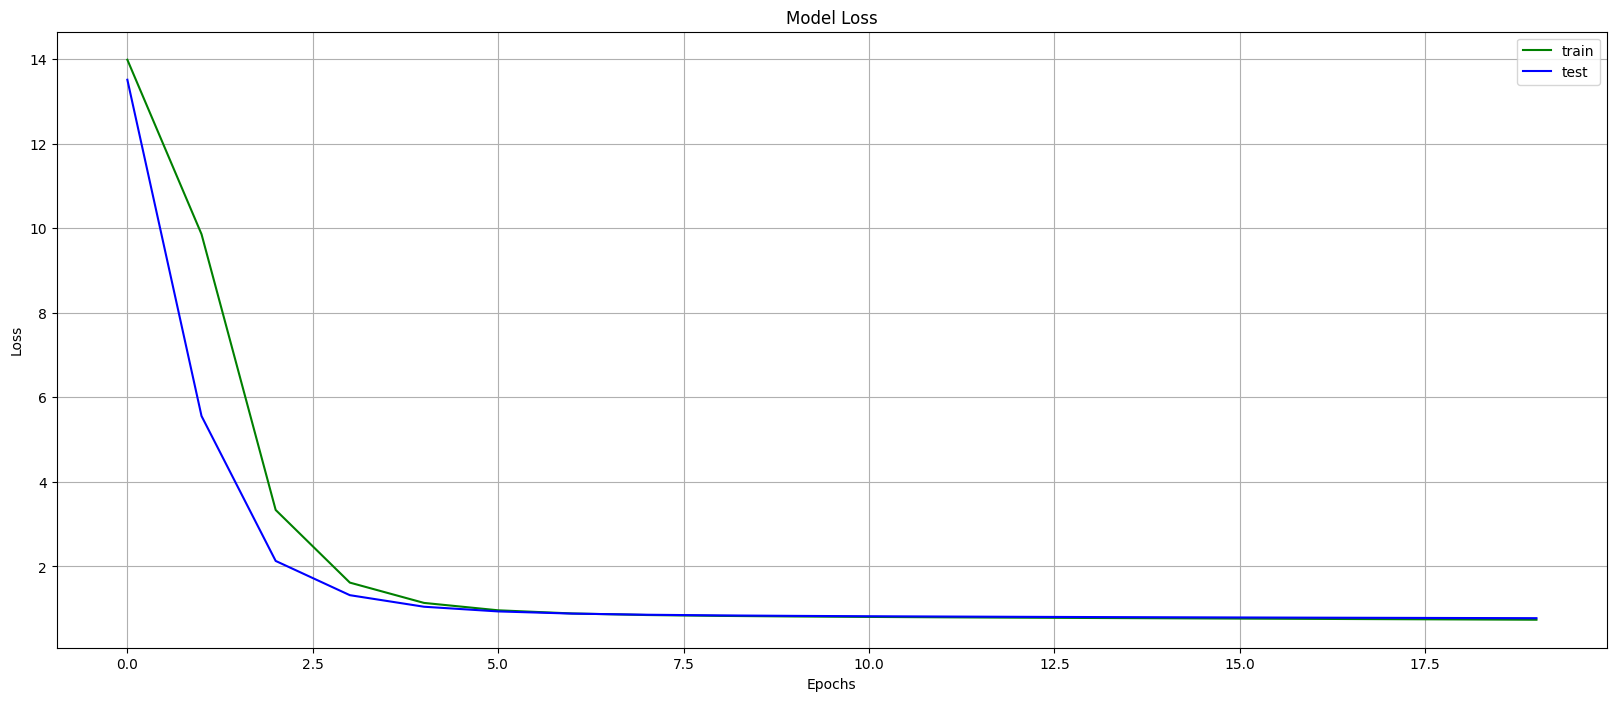

In [ ]:
plt.plot(model_hist.history['loss'] , 'g')
plt.plot(model_hist.history['val_loss'] , 'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

# Questions and Answers  :


1. Users of which age group have watched and rated the most number of movies?

    - age group "25-35"


2. Users belonging to which profession have watched and rated the most movies?
    - "College Graduate Students" and "Other category"

3. Most of the users in our dataset who've rated the movies are Male. (T/F)
    - "Male"

4. Most of the movies present in our dataset were released in which decade?
    - "90s"



5. The movie with maximum no. of ratings is ___.
    - "American Beauty"

6. Name the top 3 movies similar to 'Liar Liar' on the item-based approach.

    - "Dumb & Dumber "
    - "Ace Ventura: Pet Detective "
    - "Mask, The "



7. On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.
      
    - Memory based and Model based
    


8. Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.
    - Pearson Correlation ranges between -1 to +1
    - Cosine Similarity belongs to the interval between 0 to 1



9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.
    - RMSE: 0.881
    - MAPE: 0.265



10. Give the sparse 'row' matrix representation for the following dense matrix -

    - [[1 0],[3 7]]

            ans  :
                    [1 3 7]
                    [0 0 1]
                    [0 1 3]
            